<a href="https://colab.research.google.com/github/FatoniRahmat/Data-Analyst-in-Python/blob/main/Superstore_E_Commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SUPERSTORE SALES ANALYSIS**

**Problem Statement**
* A multinational retail company has been making good sales from 2011 to 2014, but their recorded profits do not tally with the increasing amount of sales they have made throughout the period. As an initative of the company to keep increasing their sales, whilst maximizing their sales as best as possible, the campagn titled 'Operation Increase Sales and Profit'(OISP) was launched.
* As a part of the campaign initatve, a Data Analyst is required to analyze the dataset that contains their four year daily sales records to draw insights from their "sitting" data before the management team of the company can take any actionable decision with regards to the campaign.

**My Task**
* To analyse the given data and advise management on what to do to increase sales and profit as intended in the compaign by outlaying the analytical steps inline with CRISP-DM(Cross Industry Standard Process for Data Mining)steps, asking the nescessary questions and providing answers based on the data.
* Submit statistical summaries of the key variables considering the aim of the campaign to management including visualizations and a report on my findings.

#Setup Environment & Run Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_columns', 22)
pd.set_option('display.max_rows', 10)

#Load Data

In [2]:
#Read data from google sheet
sheet_url = 'https://docs.google.com/spreadsheets/d/11K6_kWXJzVXAwfEgtFT3x4GX6gekaOn1/edit#gid=1982625353'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(sheet_url_trf)
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,1/6/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.0,106.14,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,1/8/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.37,3,0.1,36.04,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,1/5/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.12,4,0.0,29.64,8.17,High,2011
3,IT-2011-3647632,1/1/2011,1/5/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.87,3,0.5,-26.06,4.82,High,2011
4,IN-2011-47883,1/1/2011,1/8/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67,5,0.1,37.77,4.70,Medium,2011


#Basic Steps
1.Check variable names

2.Check data type

3.Handle missing values

4.Check duplicate records

5.Checking summary statistics

##1. Check variable names
Column names provide a clear identification of the data contained within each column. By reviewing the column names, i can quickly understand the type of information stored in each column. This helps me make sense of the data and interpret it correctly.


In [3]:
#Check columns
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

one column titled 'Sales' was renamed to 'Discounted Sales' as it was discovered that the Sales column were sales made per discount on each product sold.

Now, we change the order and delete the columns:

In [4]:
##Change the column name
df.columns = ['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
              'segment', 'state', 'country', 'market', 'region', 'product_id',
              'category', 'sub_category', 'product_name', 'discounted_sales', 'quantity',
              'discount(%)', 'profit', 'shipping_cost', 'order_priority', 'year']

In [5]:
#Change the column order
col_order = ['order_id', 'order_date', 'year', 'customer_name', 'segment', 'state', 'country',
             'market', 'region', 'product_id', 'category', 'sub_category', 'product_name',
             'discounted_sales', 'quantity', 'discount(%)', 'profit', 'shipping_cost', 'ship_date',
             'ship_mode', 'order_priority']
df = df[col_order]
pd.set_option('display.max_columns', None)

#Delete column year
df.drop(['country'], inplace = True, axis = 1)
df.head()

,order_id,order_date,year,customer_name,segment,state,market,region,product_id,category,sub_category,product_name,discounted_sales,quantity,discount(%),profit,shipping_cost,ship_date,ship_mode,order_priority
0,AG-2011-2040,1/1/2011,2011,Toby Braunhardt,Consumer,Constantine,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.0,106.14,35.46,1/6/2011,Standard Class,Medium
1,IN-2011-47883,1/1/2011,2011,Joseph Holt,Consumer,New South Wales,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.37,3,0.1,36.04,9.72,1/8/2011,Standard Class,Medium
2,HU-2011-1220,1/1/2011,2011,Annie Thurman,Consumer,Budapest,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.12,4,0.0,29.64,8.17,1/5/2011,Second Class,High
3,IT-2011-3647632,1/1/2011,2011,Eugene Moren,Home Office,Stockholm,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.87,3,0.5,-26.06,4.82,1/5/2011,Second Class,High
4,IN-2011-47883,1/1/2011,2011,Joseph Holt,Consumer,New South Wales,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67,5,0.1,37.77,4.70,1/8/2011,Standard Class,Medium


##2. Check data type
Checking the data types is an important step in data cleaning because it helps ensure the consistency, accuracy, and reliability of the data.

In [6]:
#Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          51290 non-null  object 
 1   order_date        51290 non-null  object 
 2   year              51290 non-null  int64  
 3   customer_name     51290 non-null  object 
 4   segment           51290 non-null  object 
 5   state             51290 non-null  object 
 6   market            51290 non-null  object 
 7   region            51290 non-null  object 
 8   product_id        51290 non-null  object 
 9   category          51290 non-null  object 
 10  sub_category      51290 non-null  object 
 11  product_name      51290 non-null  object 
 12  discounted_sales  51290 non-null  object 
 13  quantity          51290 non-null  int64  
 14  discount(%)       51290 non-null  float64
 15  profit            51290 non-null  float64
 16  shipping_cost     51290 non-null  float6

Based on data documentation, we must check whether the data type of variables is correct or not. The result shows, there is something wrong about order_date, segment, category, sub_category, discounted_sales, ship_date, ship_mode.

In [7]:
#Change data type
df['order_date'] = pd.to_datetime(df.order_date,).dt.tz_localize(None)
df['ship_date'] = pd.to_datetime(df.ship_date,).dt.tz_localize(None)
df['discounted_sales'] = df['discounted_sales'].apply(str).str.replace(',','').astype(np.float64)
df['ship_mode'] = df['ship_mode'].astype('category')
df['segment'] = df['segment'].astype('category')
df['category'] = df['category'].astype('category')
df['sub_category'] = df['sub_category'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          51290 non-null  object        
 1   order_date        51290 non-null  datetime64[ns]
 2   year              51290 non-null  int64         
 3   customer_name     51290 non-null  object        
 4   segment           51290 non-null  category      
 5   state             51290 non-null  object        
 6   market            51290 non-null  object        
 7   region            51290 non-null  object        
 8   product_id        51290 non-null  object        
 9   category          51290 non-null  category      
 10  sub_category      51290 non-null  category      
 11  product_name      51290 non-null  object        
 12  discounted_sales  51290 non-null  float64       
 13  quantity          51290 non-null  int64         
 14  discount(%)       5129

##3. Handle missing values
Checking for missing values is an important step in data cleaning because missing values can have a significant impact on the quality and reliability of the data analysis. Missing values can lead to incomplete or inaccurate data, which can skew the analysis and produce misleading results. By identifying and handling missing values appropriately, me ensure the integrity and reliability of the data.

In [8]:
#Check the amount of missing values
def nulls(df):
    null_values = pd.DataFrame(df.isnull().sum())
    null_values[1] = null_values[0] / len(df)
    null_values.columns = ['count','%pct']
    filtered_null = null_values[null_values['%pct'] > 0].sort_values(by='%pct', ascending=False)
    return filtered_null
nulls(df)

,count,%pct


So, they are not missing values in the rows.

##4. Check duplicate rows
Duplicate rows can compromise the integrity of the dataset. If we have multiple identical rows, it can lead to inaccurate statistical analysis, misleading results, and duplicate entries in downstream processes. By identifying and removing duplicate rows, we ensure that the data accurately represents the underlying information.

In [9]:
#Check for duplicate data
df.duplicated().sum()

0

So, they are not duplicated rows.

##5. Checking summary statistics

Checking summary statistics of numerical columns in the dataset

In [10]:
#statistics of numerical columns
df.describe()

,year,discounted_sales,quantity,discount(%),profit,shipping_cost
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,2012.777208,246.490685,3.476545,0.142908,28.641728,26.375915
std,1.098931,487.565388,2.278766,0.212280,174.424208,57.296804
min,2011.000000,0.440000,1.000000,0.000000,-6599.980000,0.000000
25%,2012.000000,30.762500,2.000000,0.000000,0.000000,2.610000
50%,2013.000000,85.055000,3.000000,0.000000,9.240000,7.790000
75%,2014.000000,251.055000,5.000000,0.200000,36.810000,24.450000
max,2014.000000,22638.480000,14.000000,0.850000,8399.980000,933.570000


Checking summary statistics of non-numerical columns in the dataset

In [11]:
#statistics of non-numerical columns
df.describe(include = np.object_)

,order_id,customer_name,state,market,region,product_id,product_name,order_priority
count,51290,51290,51290,51290,51290,51290,51290,51290
unique,25035,795,1094,7,13,10292,3788,4
top,CA-2014-100111,Muhammed Yedwab,California,APAC,Central,OFF-AR-10003651,Staples,Medium
freq,14,108,2001,11002,11117,35,227,29433


In [12]:
#the size dataset
df.shape
print('The number of rows is {} and number columns in the dataframe is {}'.format(df.shape[0],df.shape[1]))

The number of rows is 51290 and number columns in the dataframe is 20


#Adding Columns

New columns were added to the dataset in order to easy analyze the data in the dataset.

In [13]:
#Add the columns Month, Day and Hour for the order_date
df.insert(loc=3, column='year_month', value=df['order_date'].apply(lambda x: x.strftime('%Y-%m')))
df.insert(loc=4, column='month', value=df.order_date.dt.month)

#+1 to make Monday=1.....until Sunday=7
df.insert(loc=5, column='day', value=(df.order_date.dt.dayofweek)+1)

In [14]:
#Calculating the original sales without discounts and adding it to the dataset as a new column
original_sales = (1/(1-df['discount(%)']))*df['discounted_sales']
original_sales

0        408.300000
1        133.744444
2         66.120000
3         89.740000
4        126.300000
            ...    
51285     17.375000
51286      3.990000
51287     26.400000
51288      7.120000
51289      3.775000
Length: 51290, dtype: float64

In [15]:
df['original_sales'] = original_sales

In [16]:
#Calculating Unit Price of each product and adding it to the dataset as a new column
df['unit_price'] = original_sales/df['quantity']
df['unit_price']

0        204.150000
1         44.581481
2         16.530000
3         29.913333
4         25.260000
            ...    
51285      8.687500
51286      3.990000
51287      8.800000
51288      7.120000
51289      1.258333
Name: unit_price, Length: 51290, dtype: float64

In [17]:
#Calculating Cost Price of each product and adding it to the dataset as a new column
df_cost_price = df['discounted_sales'] - df['profit']
df_cost_price

0        302.16
1         84.33
2         36.48
3         70.93
4         75.90
          ...  
51285      9.38
51286      3.57
51287     14.04
51288      6.56
51289      3.62
Length: 51290, dtype: float64

In [18]:
df['cost_price'] = df_cost_price

In [19]:
#Calculating Discounted Amount of each product and adding it to the dataset as a new column
df['discounted_amount'] = df['original_sales'] - df['discounted_sales']

In [20]:
#Calculating Profit Percentage of each product and adding it to the dataset as a new column
df['profit(%)']=(df['profit']/df['cost_price'])*100

In [21]:
#Delivery day lengths were calculated and added as a new column to the dataset
df_interval = df["ship_date"] - df["order_date"]
df_interval = df_interval / np.timedelta64(1,'D')
df.insert(loc = 28, column = 'delivery_days', value = df_interval)
df['delivery_days'] = df['delivery_days'].astype('int')

In [22]:
#confirmation on whether deliveries were timely or delayed.
df['status_delivery'] = np.where(df['delivery_days'] >= 5, 'Delayed', 'Timely')

#Export the File
Export cleaned data.

In [23]:
#Show dataset
df.head()

,order_id,order_date,year,year_month,month,day,customer_name,segment,state,market,region,product_id,category,sub_category,product_name,discounted_sales,quantity,discount(%),profit,shipping_cost,ship_date,ship_mode,order_priority,original_sales,unit_price,cost_price,discounted_amount,profit(%),delivery_days,status_delivery
0,AG-2011-2040,2011-01-01,2011,2011-01,1,6,Toby Braunhardt,Consumer,Constantine,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.0,106.14,35.46,2011-01-06,Standard Class,Medium,408.300000,204.150000,302.16,0.000000,35.127085,5,Delayed
1,IN-2011-47883,2011-01-01,2011,2011-01,1,6,Joseph Holt,Consumer,New South Wales,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.37,3,0.1,36.04,9.72,2011-01-08,Standard Class,Medium,133.744444,44.581481,84.33,13.374444,42.736867,7,Delayed
2,HU-2011-1220,2011-01-01,2011,2011-01,1,6,Annie Thurman,Consumer,Budapest,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.12,4,0.0,29.64,8.17,2011-01-05,Second Class,High,66.120000,16.530000,36.48,0.000000,81.250000,4,Timely
3,IT-2011-3647632,2011-01-01,2011,2011-01,1,6,Eugene Moren,Home Office,Stockholm,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.87,3,0.5,-26.06,4.82,2011-01-05,Second Class,High,89.740000,29.913333,70.93,44.870000,-36.740448,4,Timely
4,IN-2011-47883,2011-01-01,2011,2011-01,1,6,Joseph Holt,Consumer,New South Wales,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67,5,0.1,37.77,4.70,2011-01-08,Standard Class,Medium,126.300000,25.260000,75.90,12.630000,49.762846,7,Delayed


In [24]:
#Export data
df.to_csv('Superstore_Dataset_Cleaned.csv')

#Exploratory Data Analysis (EDA)
* The fundamental purpose of exploratory data analysis is to aid in the examination of data prior to making any assumptions.
* It can aid in the detection of obvious errors, the understanding of data patterns, the detection of outliers or unexpected events, and the discovery of noteworthy connections between variables.


##1. Heatmap for Correlation

This is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions. The darker the colour, the stronger the correlation, the lighter the colour, the lesser the correlation.

In [25]:
#Create heatmap
heatmap = df[['cost_price', 'unit_price' ,'quantity', 'original_sales', 'profit',
              'discount(%)' , 'discounted_amount', 'discounted_sales']]
heatmap.head()

,cost_price,unit_price,quantity,original_sales,profit,discount(%),discounted_amount,discounted_sales
0,302.16,204.150000,2,408.300000,106.14,0.0,0.000000,408.30
1,84.33,44.581481,3,133.744444,36.04,0.1,13.374444,120.37
2,36.48,16.530000,4,66.120000,29.64,0.0,0.000000,66.12
3,70.93,29.913333,3,89.740000,-26.06,0.5,44.870000,44.87
4,75.90,25.260000,5,126.300000,37.77,0.1,12.630000,113.67


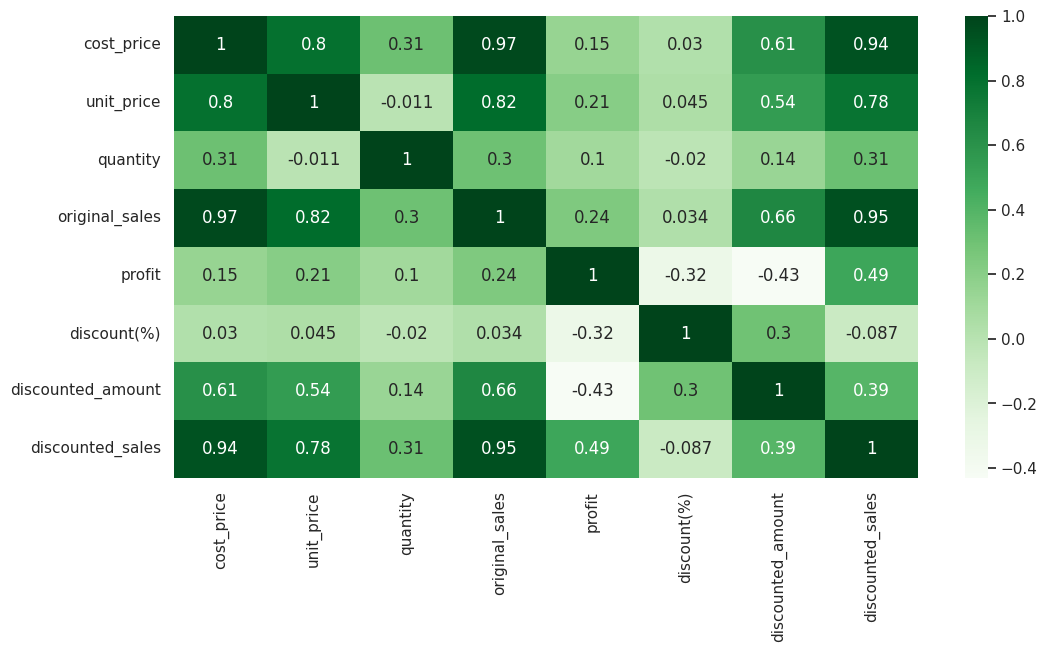

In [26]:
#Heatmap graphics
plt.figure(figsize=(12,6))
sns.set_theme(style="white")
corr = heatmap.corr()
heatmap = sns.heatmap(corr, annot=True, cmap = 'Greens')

##2. Numerical Distribution of Columns
The percentage of numeric distribution allows for the measurement of each product's or reference's coverage in a distribution network. This is an important metric for determining a product's sales potential and forecasting sales.

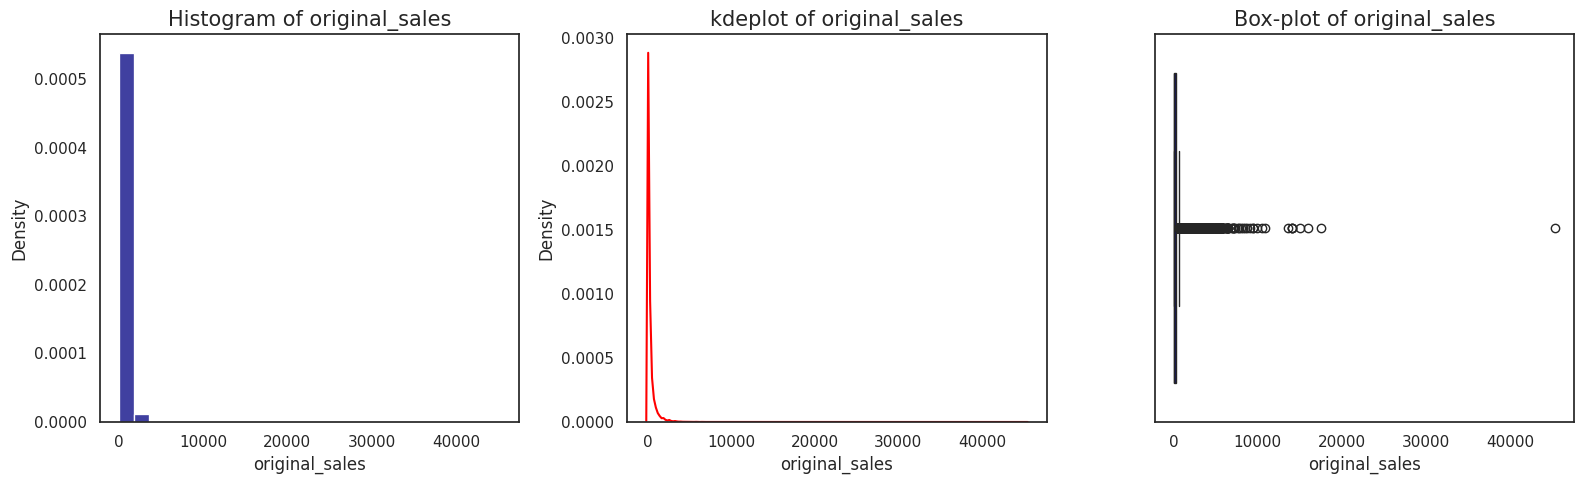

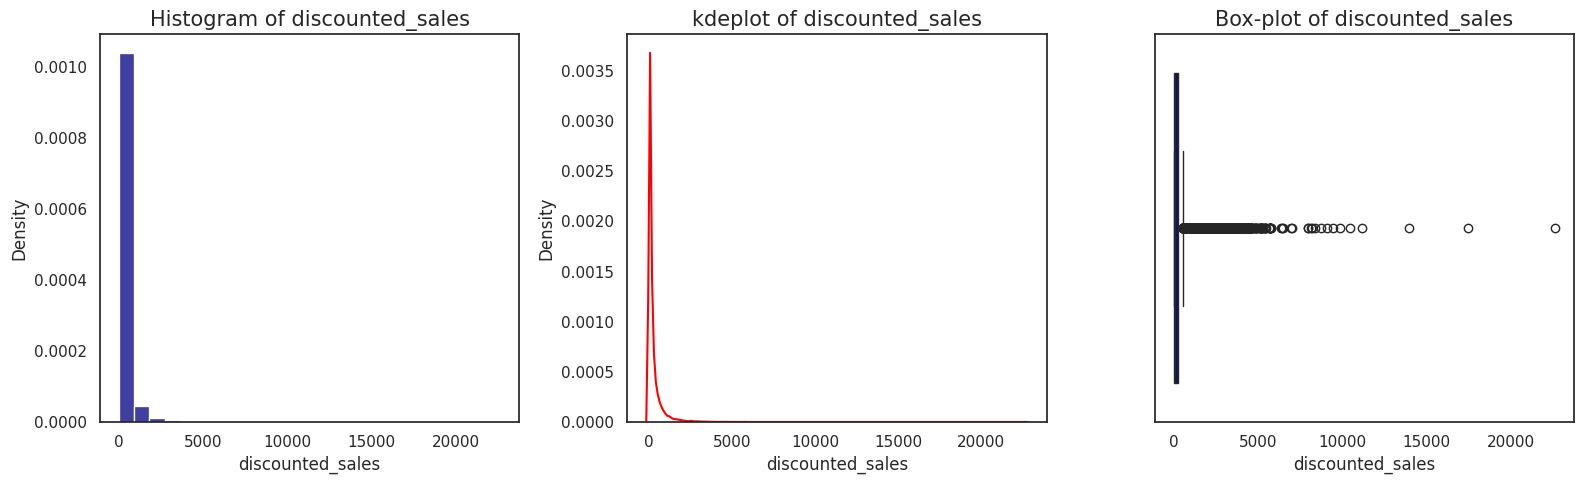

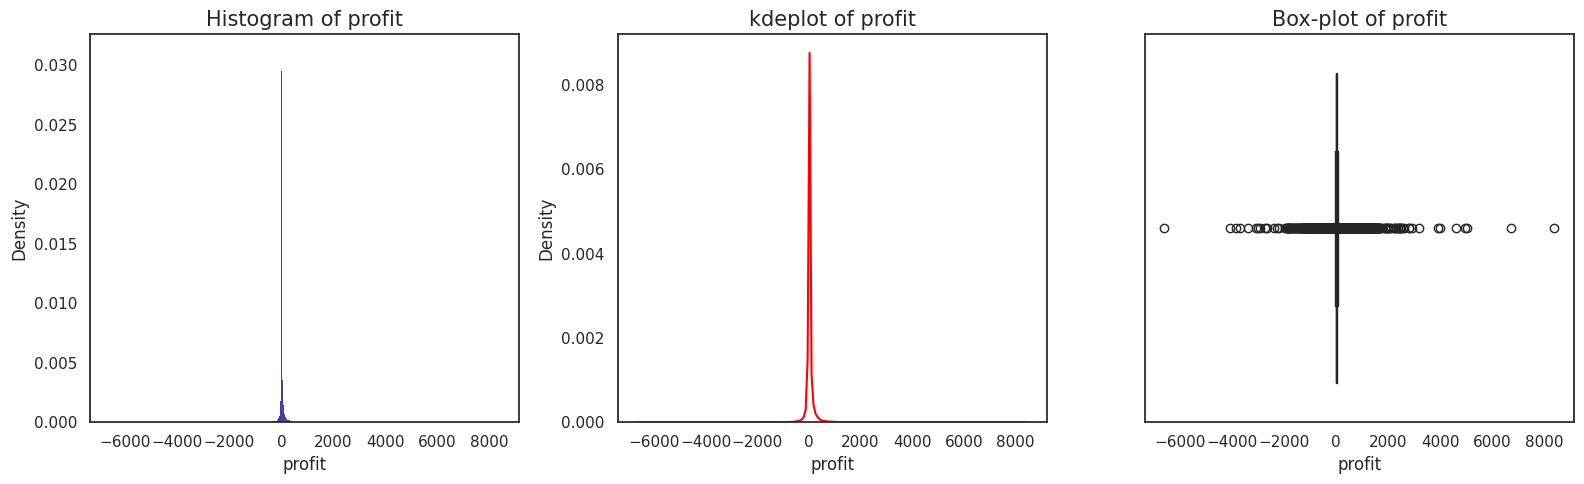

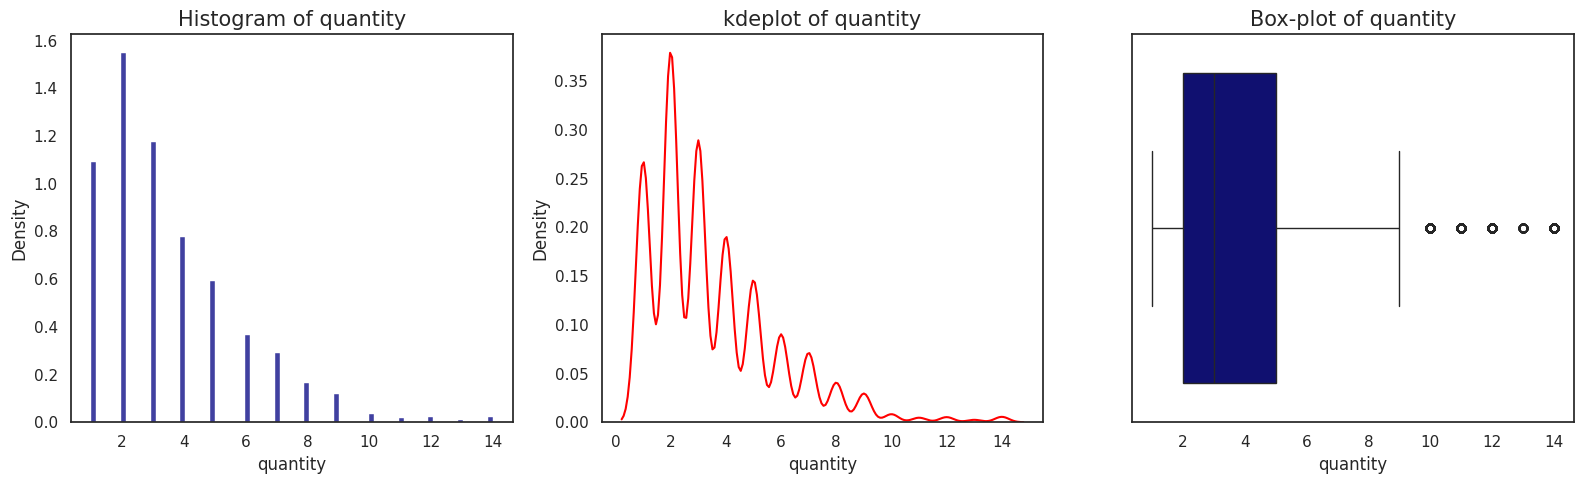

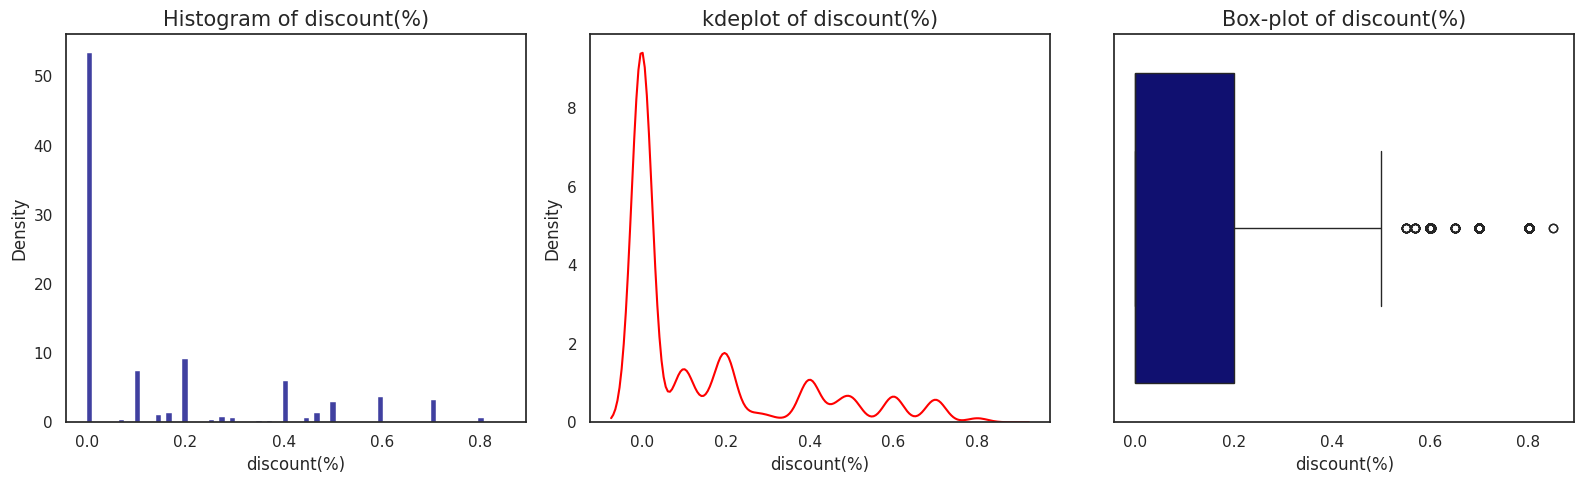

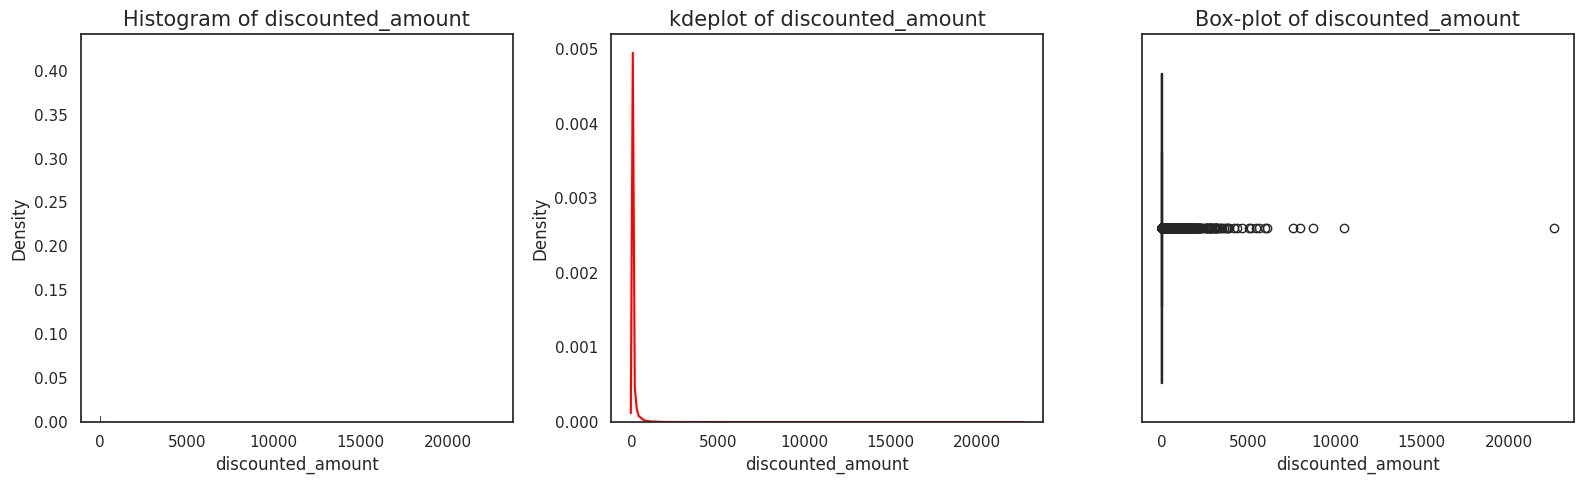

In [27]:
#Create numerical distribution
imp_numerical_cols= df[['original_sales','discounted_sales','profit','quantity','discount(%)', 'discounted_amount']]
for i,col in enumerate(imp_numerical_cols):
    plt.figure(figsize=(16,5))
    bins='auto'
    if i in [0,1]:
        bins=25
    plt.subplot(1,3,1)
    sns.histplot(data = df,x=col,stat='density',bins=bins,color='navy')
    plt.title(f'Histogram of {col}',size=15)

    plt.subplot(1,3,2)
    sns.kdeplot(data = df,x=col,color='red')
    plt.title(f'kdeplot of {col}',size=15)

    plt.subplot(1,3,3)
    sns.boxplot(data = df,x=col,color='navy')
    plt.title(f'Box-plot of {col}',size=15)
    plt.tight_layout()
    plt.show()

**The following observations were made from the numerical distribution of some column in the immediate line of code above**

* The Distribution of Original Sales and Discounted_Sales is extremely right skewed.
* The Distribution of Profit is Normally distributed with very low value of standard deviation.
* The Distribution of Quantity sold is right skewed with a lot of outliers on the right side
* The Distribution of Discount is multimodel in nature

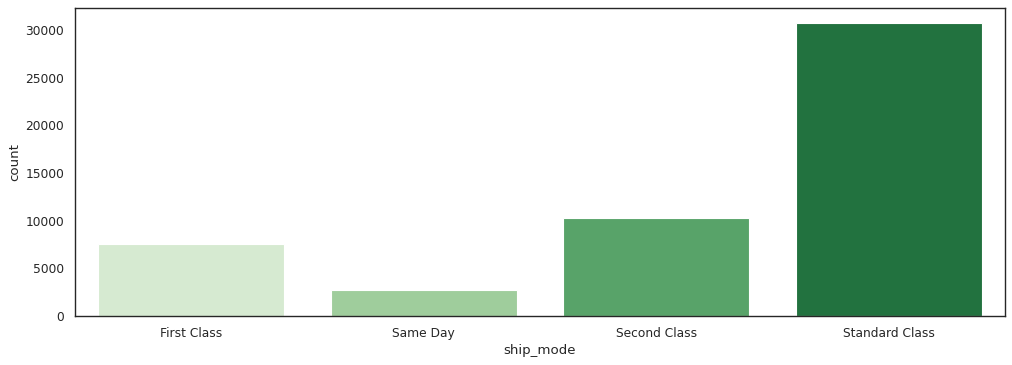

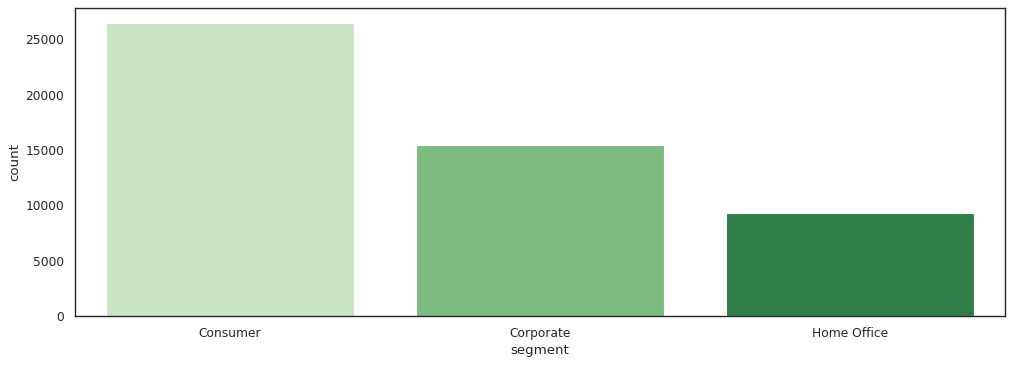

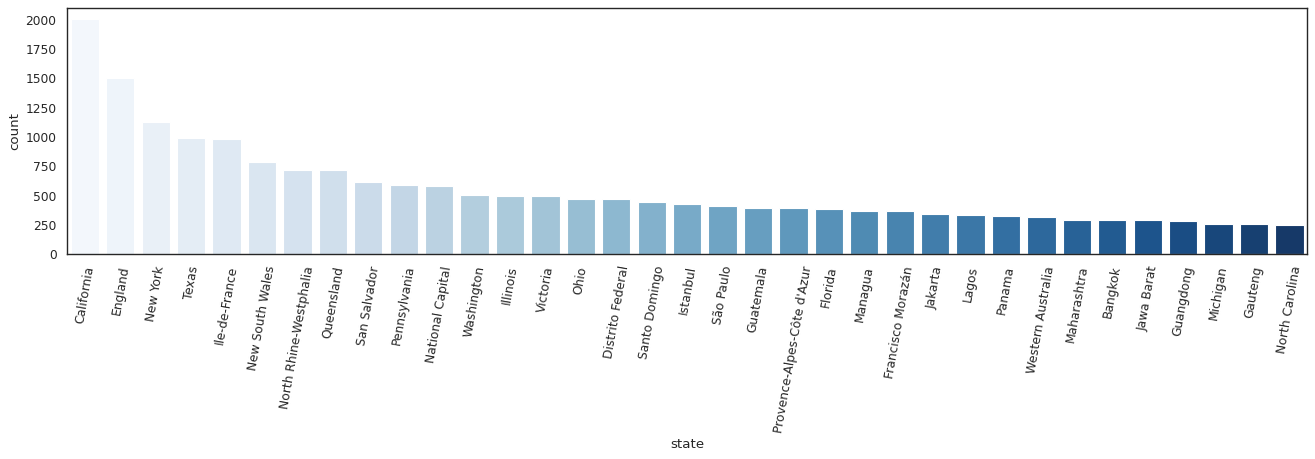

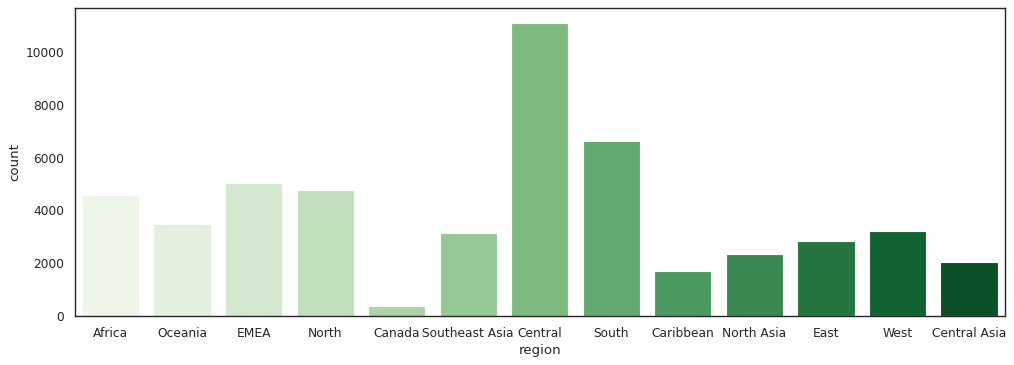

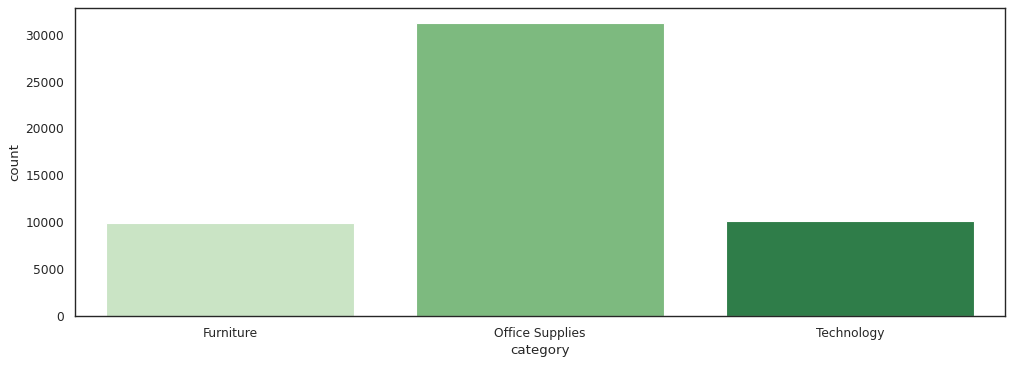

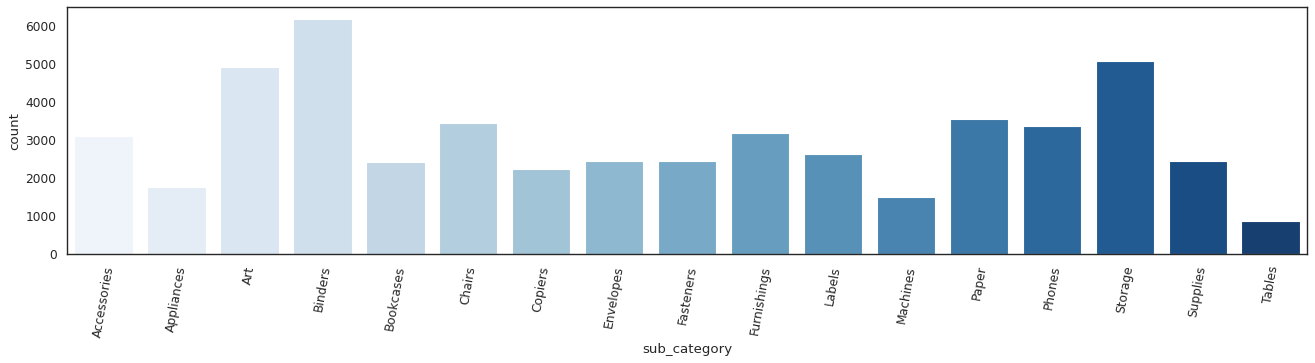

In [28]:
#Distribution graphics
imp_categotical_features=df[['ship_mode', 'segment', 'state', 'region', 'category', 'sub_category']]

for col in imp_categotical_features:
    width=15
    n=len(df[col].unique())
    if n > 15:
        width=20
        plt.figure(figsize=(width,4),dpi=80)
        temp=pd.DataFrame(df[col].value_counts().sort_values(ascending=False)[:35],columns=[col])
        sns.barplot(data=temp,x=temp.index,y=col,palette= 'Blues')
        plt.ylabel("count")
        plt.xlabel(col)
        plt.xticks(rotation=80)
    else:
        plt.figure(figsize=(width,5),dpi=80)
        sns.countplot(data=df,x=col,palette='Greens')
    plt.show()

**Insight:**
* Majority of customers prefer Standard Class Shipping mode.
* Most customers come from the Consumer segment.
* Among all the states, California recorded the maximum purchases and in second place was the UK.
* The majority of purchases are in the Central, Southern, European and African regions compared to East, West and Asian countries.
* Office Supplies leads the category of purchases made.
* Top Three purchases in the Product Sub-Category are Binders, Storage and Art.

##3. Sales and Profit Analysis

In [29]:
#Count sales profit segment
sum_sales_profit = df.groupby('segment').sum()[['discounted_sales','profit']]
sum_sales_profit = sum_sales_profit.reset_index()
sum_sales_profit

,segment,discounted_sales,profit
0,Consumer,6507952.31,749239.28
1,Corporate,3824698.96,442785.69
2,Home Office,2309855.98,277009.28


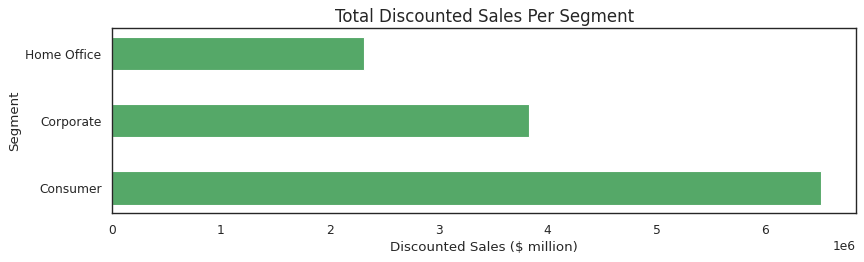

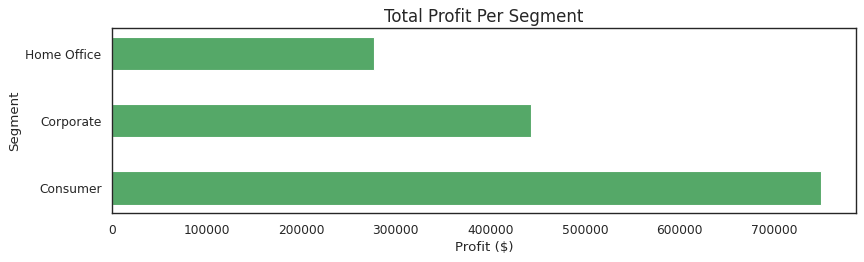

In [30]:
#Sales profit segment graphics
plt.figure(figsize=(12,3),dpi=80)
plt.barh(sum_sales_profit['segment'],sum_sales_profit['discounted_sales'],
        color = 'g',
        alpha = 1,
       height=0.5)

plt.title('Total Discounted Sales Per Segment',fontdict={'fontsize':15})
plt.ylabel('Segment')
plt.xlabel('Discounted Sales ($ million)')
plt.show()

plt.figure(figsize=(12,3),dpi=80)
plt.barh(sum_sales_profit['segment'],sum_sales_profit['profit'],
        color = 'g',
        alpha = 1,
       height=0.5)

plt.title('Total Profit Per Segment',fontdict={'fontsize':15})
plt.ylabel('Segment')
plt.xlabel('Profit ($)')
plt.show()

**Insight:**
* From the above graphs, it is realized that the consumer segment is doing positively well in terms of profit and discounted sales anfd the Home Office segment is the least performing in terms of discounted sales and profit.
* Please keep in mind that this chart is based on the total amount of discounted sales and profit for each segment.

In [31]:
#Average segment sales profit
mean_sales_profit = df.groupby('segment').mean()[['discounted_sales','profit']]
mean_sales_profit = mean_sales_profit.reset_index()
mean_sales_profit

,segment,discounted_sales,profit
0,Consumer,245.416408,28.253989
1,Corporate,247.890269,28.698275
2,Home Office,247.228511,29.648858


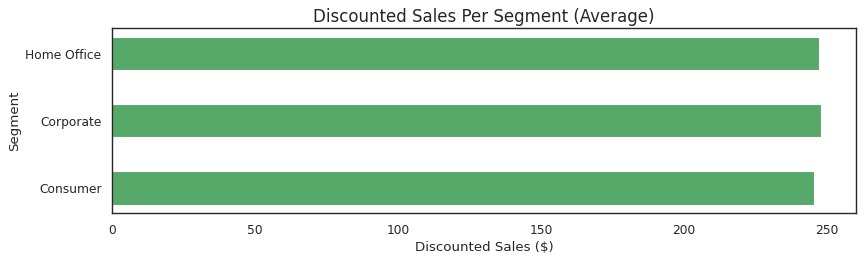

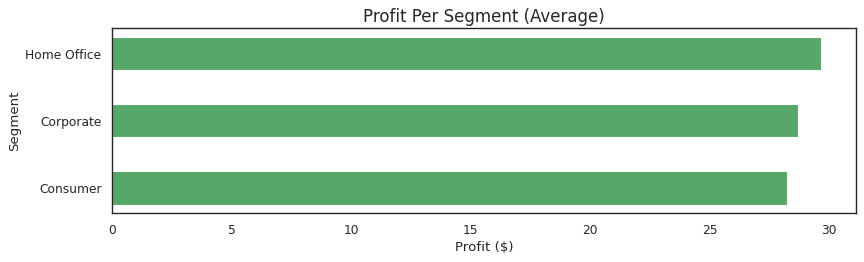

In [32]:
#Average sales profit segment graphics
plt.figure(figsize=(12,3),dpi=80)
plt.barh(mean_sales_profit['segment'],mean_sales_profit['discounted_sales'],
        color = 'g',
        alpha = 1,
       height=0.5)

plt.title('Discounted Sales Per Segment (Average)',fontdict={'fontsize':15})
plt.ylabel('Segment')
plt.xlabel('Discounted Sales ($)')
plt.show()

plt.figure(figsize=(12,3),dpi=80)
plt.barh(mean_sales_profit['segment'],mean_sales_profit['profit'],
        color = 'g',
        alpha = 1,
       height=0.5)

plt.title('Profit Per Segment (Average)',fontdict={'fontsize':15})
plt.ylabel('Segment')
plt.xlabel('Profit ($)')
plt.show()

**Insight:**
* It can be seen from the graph and lines of code that the consumer segment performs poorly in terms of profits but well in terms of discount sales, while the Home Office segment performs best in terms of discount sales and profits.
* Please note that this chart is based on the average amount of discounted sales and profits for each segment.

Given the obvious differences in the graphical results above based on changes such as "total" and "average" segments, it is important to note that basing your analysis on total sales or discounted profits will provide misleading results.

* This is because the total takes into account every purchase made.
* Average takes into account every purchase made all things being equal.

##4. Best Performing Category

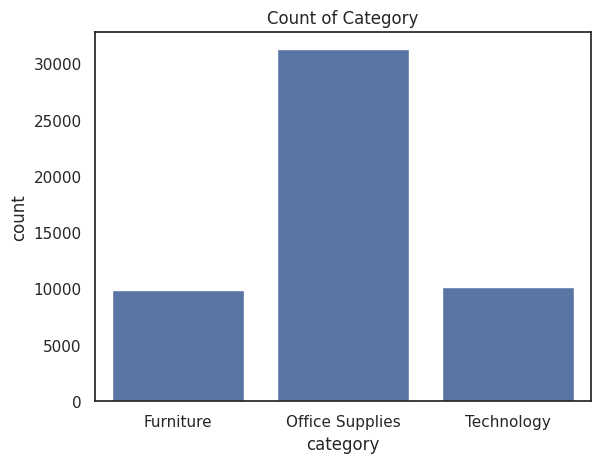

In [33]:
#Count highest category
sns.countplot(x='category', data = df)
plt.title('Count of Category')
plt.show()

**Insight:**
* Office Supplies is the best performing category
* Technology is the second best performing category
* Furniture is the least performing category

##5. Best Selling and Most Profitable Category

In [34]:
#Count sales profit category
profit_category_sum = pd.DataFrame(df.groupby(['category'])[['discounted_sales', 'profit', 'quantity']].sum())
profit_category_sum

,discounted_sales,profit,quantity
category,,,
Furniture,4110875.32,286782.14,34954
Office Supplies,3787073.17,518472.85,108182
Technology,4744558.76,663779.26,35176


In [35]:
#Average sales profit category
profit_category_mean = pd.DataFrame(df.groupby(['category'])[['discounted_sales', 'profit', 'quantity']].mean())
profit_category_mean

,discounted_sales,profit,quantity
category,,,
Furniture,416.249020,29.038289,3.539287
Office Supplies,121.097214,16.578929,3.459278
Technology,467.859063,65.455010,3.468691


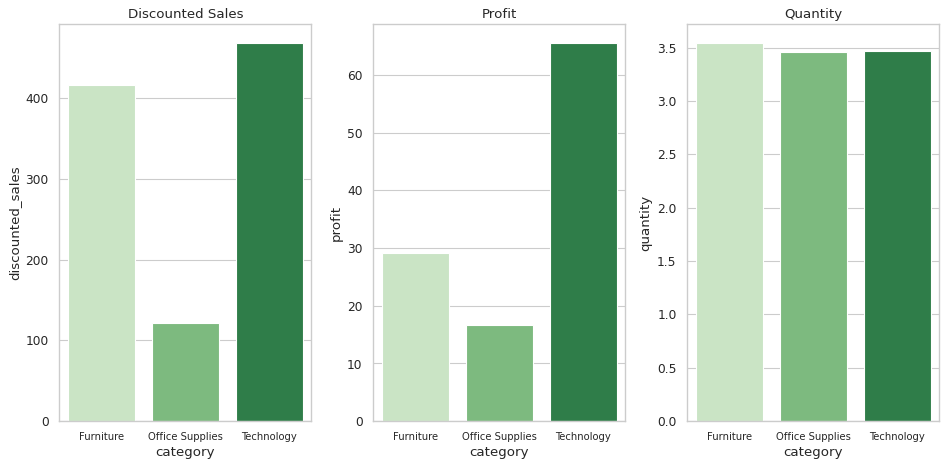

In [36]:
#Average sales profit category graphics
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 3, figsize=(12, 6),dpi=80)

cat1 = sns.barplot(x = profit_category_mean.index, y = profit_category_mean.discounted_sales, ax=axis[0], palette = "Greens")
cat2 = sns.barplot(x = profit_category_mean.index, y = profit_category_mean.profit, ax=axis[1], palette = "Greens")
cat3 = sns.barplot(x = profit_category_mean.index, y = profit_category_mean.quantity, ax=axis[2], palette = "Greens")

cat1.set(title = 'Discounted Sales')
cat2.set(title = 'Profit')
cat3.set(title = 'Quantity')

plt.setp(cat1.get_xticklabels(), rotation = 'horizontal', size = 9)
plt.setp(cat2.get_xticklabels(), rotation = 'horizontal', size = 9)
plt.setp(cat3.get_xticklabels(), rotation = 'horizontal', size = 9)

figure.tight_layout()

**Insight:**
* Here, we can see that although the numbers for all Categories are almost the same as in the graph on the far right, it is apparent that the Technology category has the highest sales, and equally brings in the most sales to the superstore.

* Next, we see that the Furniture category is the second best-selling category after the Technology category but generates half the profits.

* Lastly, the category with the fewest sales shown as Office Supplies, is the second best performing category in terms of profits.

* This insight is important for data-based decisions in the final analysis.

##6. Count of Sub-Category

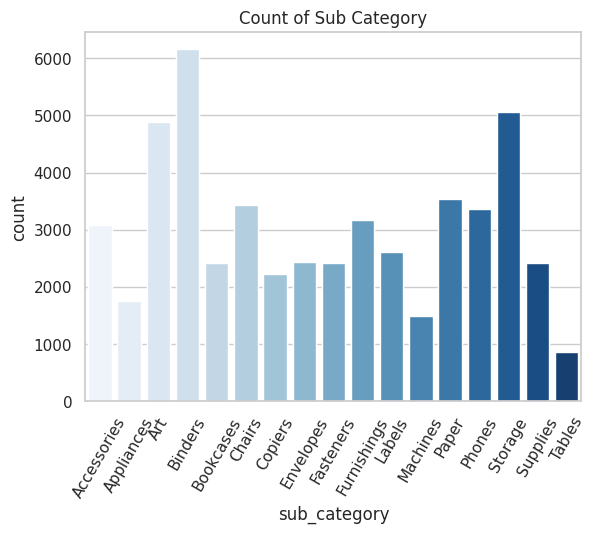

In [37]:
#Count sub category
sns.countplot(x='sub_category', data = df)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=temp,x=temp.index,y=col,palette= 'Blues')
plt.xticks(rotation=60)
plt.title('Count of Sub Category')
plt.show()

##7. Most Profitable Sub-Category

In [38]:
#Average sales profit sub-category graphics
profit_subcategory_mean = pd.DataFrame(df.groupby(['sub_category'])[['discounted_sales', 'profit']].mean())

#Sort by descending order according to sales
subcategory_mean = pd.DataFrame(profit_subcategory_mean.sort_values('discounted_sales', ascending = False))
subcategory_mean = subcategory_mean.reset_index()
subcategory_mean.head(5)

,sub_category,discounted_sales,profit
0,Tables,879.259199,-74.429210
1,Copiers,679.008776,116.314723
2,Bookcases,608.283928,67.160668
3,Appliances,576.105151,80.729715
4,Machines,524.266703,39.614872


In [39]:
#Sort by descending order according to profit
subprofit_mean = pd.DataFrame(subcategory_mean.sort_values('profit', ascending = False))
subprofit_mean = subprofit_mean.reset_index()
subprofit_mean.head(5)

,index,sub_category,discounted_sales,profit
0,1,Copiers,679.008776,116.314723
1,3,Appliances,576.105151,80.729715
2,2,Bookcases,608.283928,67.160668
3,5,Phones,508.437489,64.556893
4,7,Accessories,243.654400,42.154940


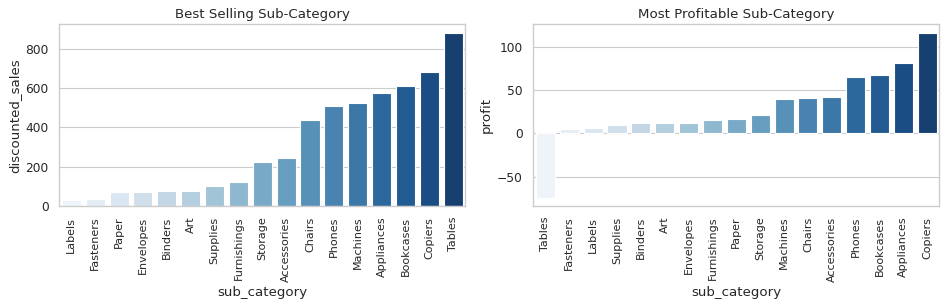

In [40]:
#Average sales profit sub-category graphics
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 2, figsize=(12, 4),dpi=80)
subcat1 = sns.barplot(data = subcategory_mean, x = subcategory_mean.sub_category, y = subcategory_mean.discounted_sales,
                      ax=axis[0], palette = "Blues",
                      order=subcategory_mean.sort_values('discounted_sales').sub_category)
subcat1.set(title="Best Selling Sub-Category")
subcat1.set_xticklabels(subcat1.get_xticklabels(),rotation = "vertical", size = 10)
subcat2 = sns.barplot(data = subprofit_mean, x = subprofit_mean.sub_category, y = subprofit_mean.profit, ax=axis[1],
                      palette = "Blues",order=subprofit_mean.sort_values('profit').sub_category)
subcat2.set(title = "Most Profitable Sub-Category")
subcat2.set_xticklabels(subcat2.get_xticklabels(),rotation = "vertical", size = 10)
figure.tight_layout()
plt.show()

**Insight:**
* From the graph on the top right, it can be seen that Tables is the subcategory that causes the most losses to negative profit figures.
* From the graph on the left, the Tables subcategory is the best-selling subcategory.
* It should be noted that although Tables is the least profitable subcategory, it is shown as the best-selling subcategory in the graph on the left.

It is an immediate recommendation that:

* Super Stores must ensure inventory is always well stocked for top-selling subcategories.
* Despite being the most profitable, Photocopiers sell at least hundreds of units, but since it is a relatively expensive piece of office equipment and is usually used for several years, it is understandable that it sells the least of them all.
* Another interesting fact- people don't like buying Tables from Superstores. Therefore this department is making a loss.

##8. Region with The Highest Count

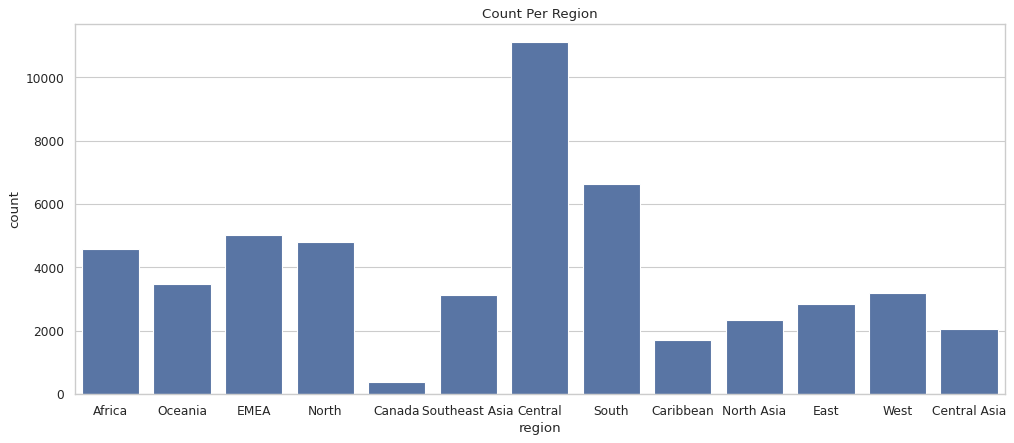

In [41]:
#Count highest region
plt.figure(figsize=(15,6),dpi=80)
sns.countplot(x='region', data = df)
sns.set_style("whitegrid")
plt.xticks(rotation = 0)
plt.title('Count Per Region')
plt.show()

##9. Top Ten Best Performing State

In [42]:
#Average highest performing states
state_sales_df = pd.DataFrame(df.groupby(['state'])['discounted_sales','quantity','profit'].mean().
                             sort_values('discounted_sales',ascending = False))
top10 = state_sales_df[:10]
top10

,discounted_sales,quantity,profit
state,,,
Paysandú,3473.140000,11.000000,868.120000
Elbasan,1619.100000,10.000000,258.900000
Wyoming,1603.140000,4.000000,100.200000
Qinghai,1422.862500,4.000000,341.752500
Shizuoka,1326.695455,5.090909,505.246364
Shumen,1272.600000,2.000000,279.960000
Khulna,1140.702000,4.700000,278.217000
Khorezm,1124.100000,10.000000,146.100000
Maseru,1118.665000,3.833333,233.035000


In [43]:
#Bottom highest performing states
bottom10 = state_sales_df[-10:]
bottom10

,discounted_sales,quantity,profit
state,,,
Pernik,14.820000,1.000000,6.660000
Jinja,14.512857,1.428571,-22.281429
Afyonkarahisar,14.370000,1.666667,-6.430000
Gombe,12.025000,1.500000,-10.542500
Yalova,11.820000,1.000000,-14.250000
Zhambyl,11.025000,1.500000,-14.295000
Bitola,10.980000,1.000000,4.500000
Manicaland,5.925000,1.000000,-6.930000
Kabarole,3.570000,1.000000,-5.490000


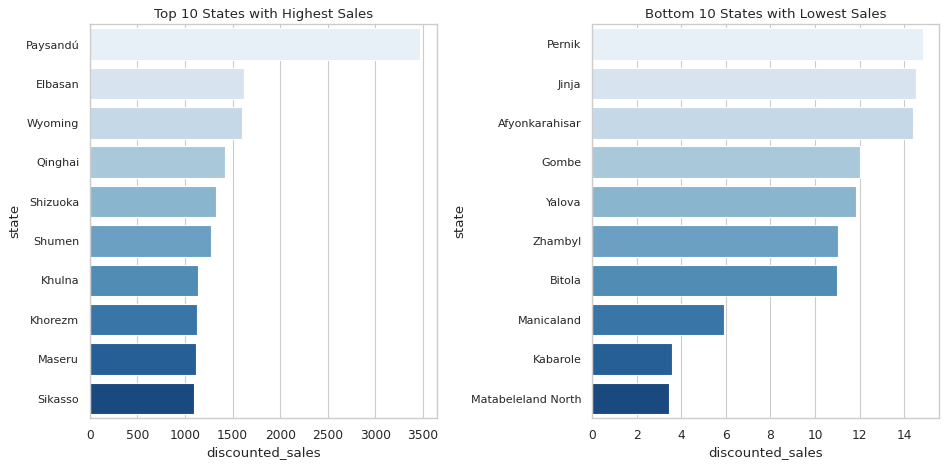

In [44]:
#Best performing state graph
figure, axis = plt.subplots(1,2, figsize=(12, 6),dpi=80)
sns.set_theme(style="whitegrid")
top10c = sns.barplot(data = top10, y = top10.index, x = top10.discounted_sales, palette = "Blues", ax = axis[0])
top10c.set_yticklabels(top10c.get_yticklabels(),size = 10)
top10c.set(title = 'Top 10 States with Highest Sales')

bottom10c = sns.barplot(data = bottom10, y = bottom10.index, x = bottom10.discounted_sales, palette = "Blues", ax=axis[1])
bottom10c.set_yticklabels(bottom10c.get_yticklabels(),size = 10)
bottom10c.set(title = 'Bottom 10 States with Lowest Sales' )

figure.tight_layout()
plt.show()

##10. Best Performing Product

In [45]:
#Product Office Supplies
fur_entr=df[df['category']=='Office Supplies']

In [46]:
#Count Product Office Supplies
fur_group=fur_entr.groupby(['category', 'product_name'])['quantity'].sum().reset_index().sort_values('quantity', ascending = False)
fur_group=fur_group[['product_name','quantity']].set_index('product_name')
fur_group

,quantity
product_name,
Staples,814
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
...,...
"OIC Thumb Tacks, 12 Pack",0
"OIC Thumb Tacks, Assorted Sizes",0
"OIC Thumb Tacks, Bulk Pack",0


<Axes: ylabel='quantity'>

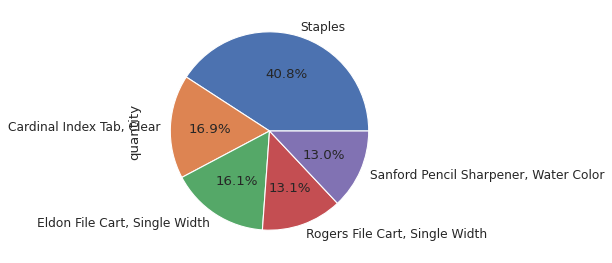

In [47]:
plt.figure(figsize=(4,8),dpi=80)
fur_group.head(5)['quantity'].plot.pie(autopct="%1.1f%%")

##11. Count of Sub-Category Region-Wise

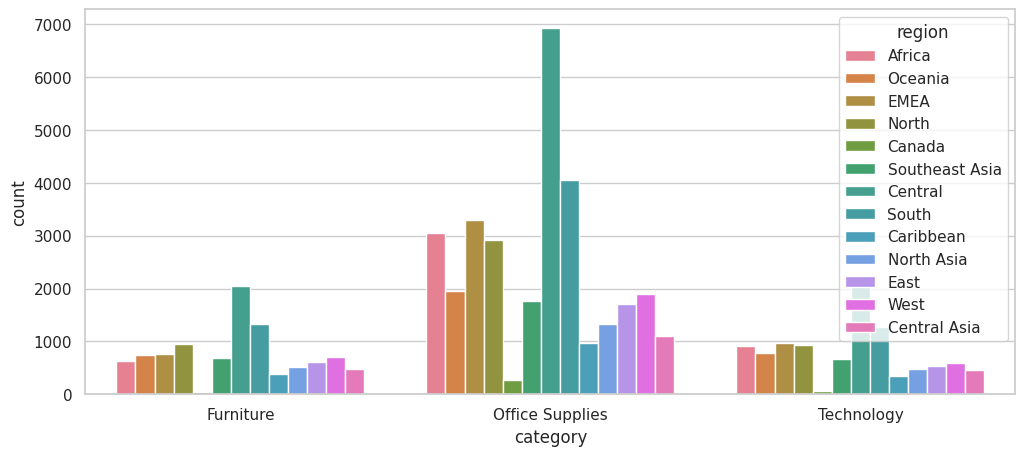

In [48]:
#Sub-Category Region-Wise graph
plt.figure(figsize=(12,5))
sns.countplot(x='category', hue='region', data=df)
plt.show()

**Insight:**
* It can be seen in the above line of code that people living in the central US tend to order more from superstores.

##12. Customer Analysis

In [49]:
#Top 10 customers who order frequently
df_top10= df['customer_name'].value_counts().head(10)
df_top10

Muhammed Yedwab    108
Steven Ward        106
Patrick O'Brill    102
Bill Eplett        102
Gary Hwang         102
Harry Greene       101
Eric Murdock       100
Art Ferguson        98
Brosina Hoffman     97
Bart Watters        96
Name: customer_name, dtype: int64

##13. Discount Column Insights

In [50]:
#Count discount sub-category
a = df.pivot_table('discount(%)', index = 'sub_category', aggfunc='sum')
a = a.reset_index().sort_values('discount(%)')
a

,sub_category,discount(%)
1,Appliances,248.700
16,Tables,250.320
11,Machines,252.000
6,Copiers,260.418
15,Supplies,310.200
...,...,...
13,Phones,489.610
5,Chairs,560.120
2,Art,573.080
14,Storage,700.490


<Axes: xlabel='sub_category'>

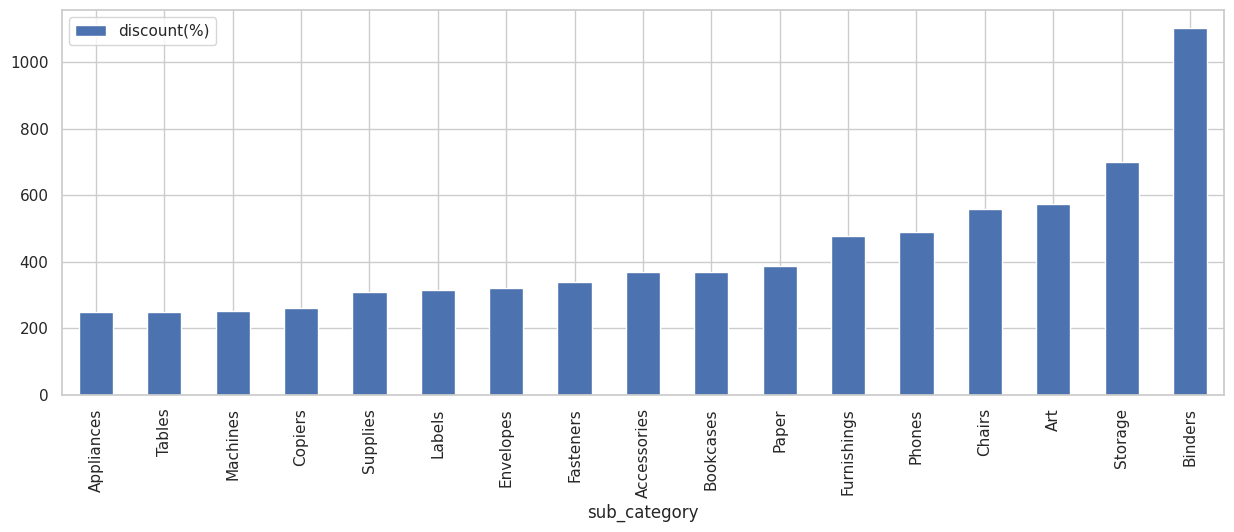

In [51]:
#Discount sub-category graph
a.plot.bar(x= 'sub_category')

##14. Monthly and Yearly Analysis

In [52]:
#Which month does the company records more sales?
month_sales_df = pd.DataFrame(df.groupby(['month'])['discounted_sales', 'quantity', 'profit', 'discounted_amount']
                              .mean().sort_values('discounted_sales',ascending = False))
month_sales_df = month_sales_df.reset_index()
month_sales_df = month_sales_df.set_index('month')
month_sales_df

,discounted_sales,quantity,profit,discounted_amount
month,,,,
10,260.174788,3.574388,35.026612,43.621569
1,259.766853,3.402462,28.293717,47.831539
8,254.791993,3.468098,29.904323,44.249092
3,253.871937,3.453377,31.000794,51.957570
12,250.838040,3.540781,27.089473,49.578465
...,...,...,...,...
5,241.263077,3.480651,27.891601,45.260932
9,240.565809,3.437992,28.525238,43.800090
6,238.176162,3.398799,27.589379,45.478299


**Insight:**
* In October to December the company recorded its highest sales.

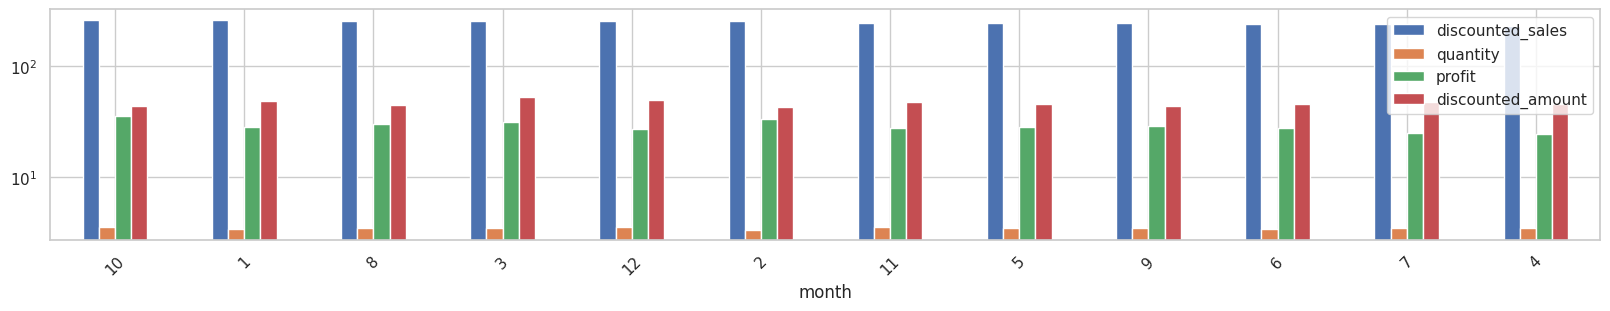

In [53]:
#Average monthly sales graph
month_sales_df.plot(kind = 'bar', figsize = (20,3))
plt.xticks(rotation = 45)
plt.yscale('log')

In [54]:
#Count of total monthly sales and profit
tf = df.groupby(['month'])['discounted_sales', 'sub_category', 'profit', 'quantity', 'discounted_amount'].sum()
tf.head()

,discounted_sales,profit,quantity,discounted_amount
month,,,,
1,675134.05,73535.37,8843,124314.170973
2,543739.68,72509.63,7281,91335.992609
3,770501.33,94087.41,10481,157691.223834
4,698561.65,73513.77,10552,136888.506465
5,904012.75,104509.83,13042,169592.714062


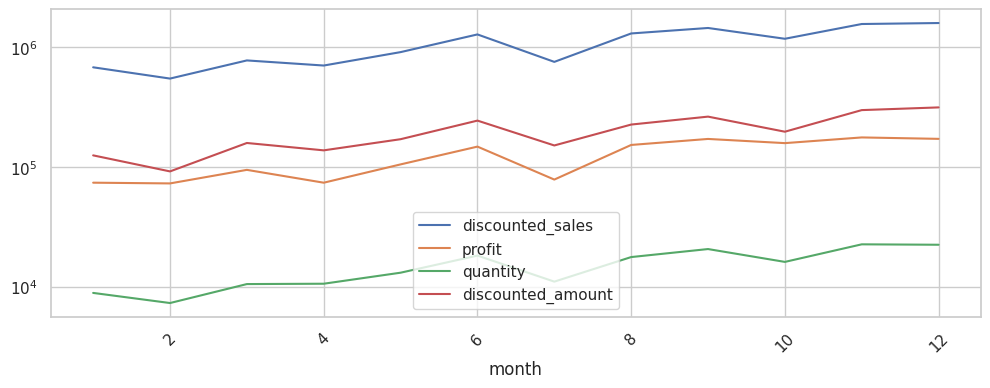

In [55]:
#Graph of total monthly sales and profit
tf.plot(kind = 'line', figsize = (12,4))
plt.xticks(rotation = 45)
plt.yscale('log')

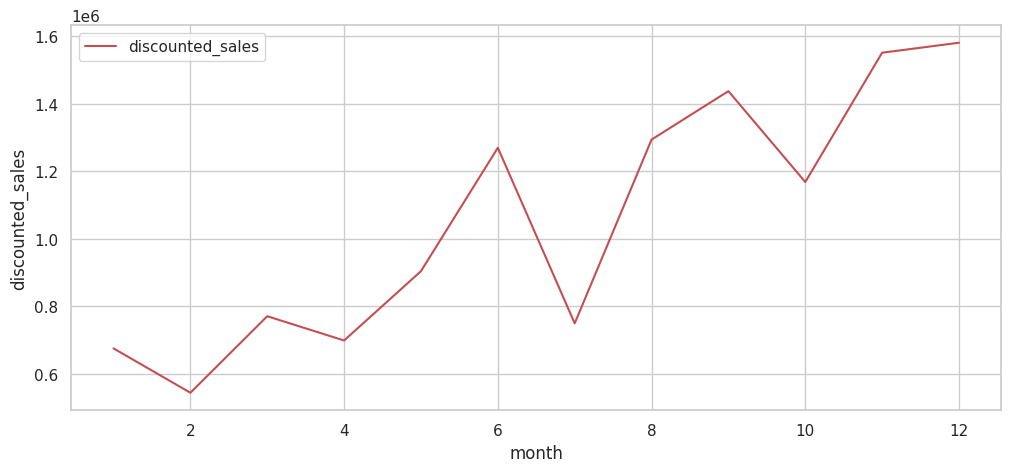

In [56]:
#Graph of total monthly discounted sales
plt.figure(figsize = (12,5))
sns.lineplot(x='month', y='discounted_sales', data = tf, color = 'r', label= 'discounted_sales')
plt.legend()

In [57]:
#Count monthly analysis
tf = tf.reset_index()
tf

,month,discounted_sales,profit,quantity,discounted_amount
0,1,675134.05,73535.37,8843,124314.170973
1,2,543739.68,72509.63,7281,91335.992609
2,3,770501.33,94087.41,10481,157691.223834
3,4,698561.65,73513.77,10552,136888.506465
4,5,904012.75,104509.83,13042,169592.714062
...,...,...,...,...,...
7,8,1293833.74,151854.15,17611,224696.890452
8,9,1437380.71,170438.30,20542,261705.535703
9,10,1168184.80,157269.49,16049,195860.843502
10,11,1551278.07,175449.54,22494,296634.798031


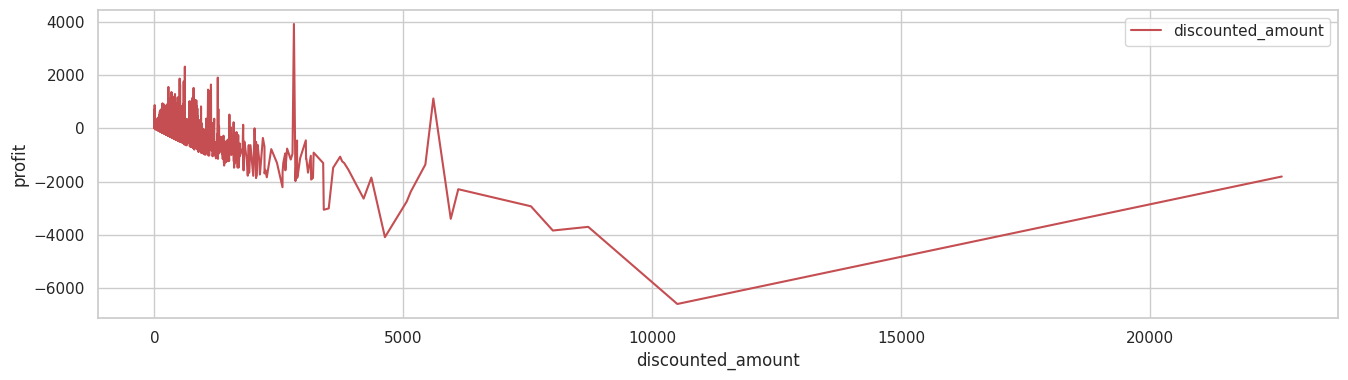

In [58]:
#Graph comparing the amount of discount with profit
plt.figure(figsize = (16,4))
sns.lineplot(x='discounted_amount', y='profit', data = df, color = 'r', label= 'discounted_amount')
plt.legend()

In [59]:
#Which year does the company records more sales?
year_sales_df = pd.DataFrame(df.groupby(['year'])['discounted_amount', 'profit'].mean().sort_values
                             ('year',ascending = True))
year_sales_df = year_sales_df.reset_index()
year_sales_df

,year,discounted_amount,profit
0,2011,51.382783,27.666189
1,2012,44.361127,28.043728
2,2013,45.086686,29.604496
3,2014,45.246213,28.758547


**Insight:**
* There is a gradual increase in sales, qauntity and profit of company records

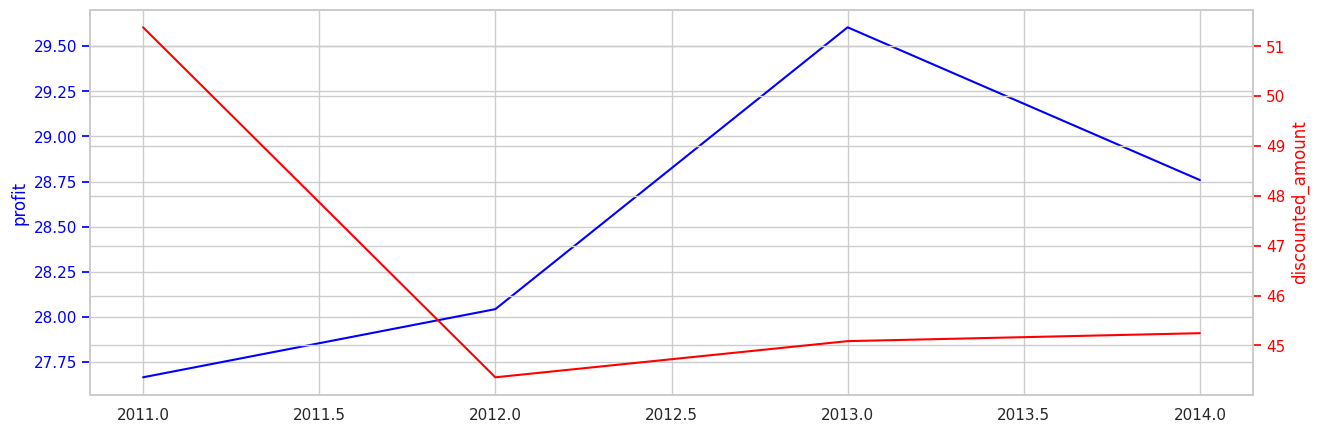

In [60]:
#Graph comparing the amount of discounts with profits
fig,ax = plt.subplots()

#Plot the CO2 variable in blue
ax.plot(year_sales_df['year'], year_sales_df['profit'], color='blue')
ax.set_ylabel('profit',color='blue')
ax.tick_params('y', colors='blue')

#Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

#Plot the relative temperature in red
ax2.plot(year_sales_df['year'], year_sales_df['discounted_amount'], color='red')
ax2.set_ylabel('discounted_amount',color='red')
ax2.tick_params('y', colors='red')
plt.show()

##15. Customer Segment The Most Profitable

In [61]:
#Count profitable customer segment
df4 = pd.DataFrame(df.groupby(['segment'])[['profit']].mean())
df4

,profit
segment,
Consumer,28.253989
Corporate,28.698275
Home Office,29.648858


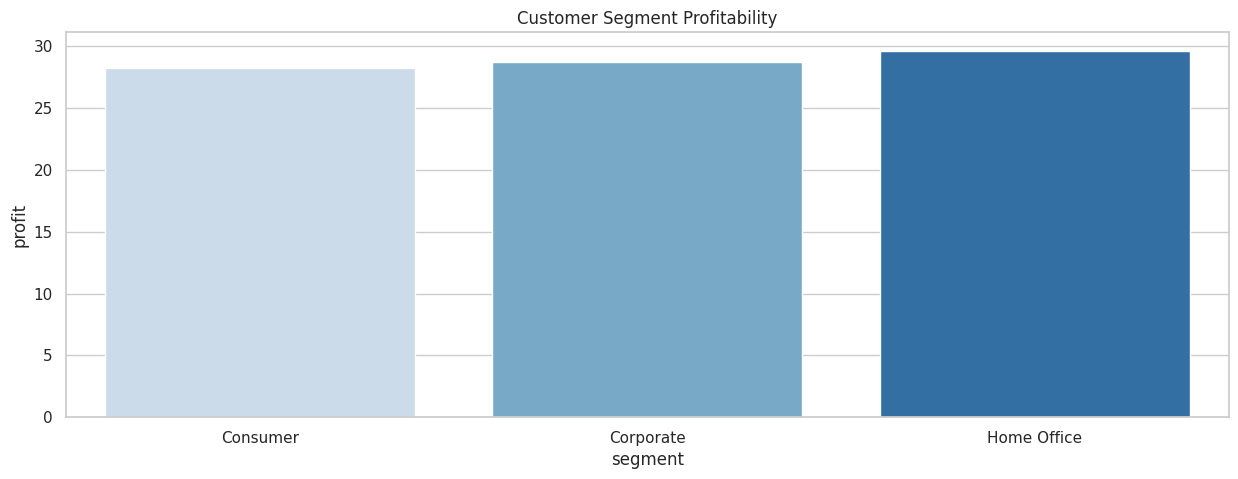

In [62]:
#Profitable customer segment graph
sns.set_theme(style="whitegrid")
sns.barplot(data = df4, x = df4.index, y = df4.profit, palette = "Blues")
plt.title("Customer Segment Profitability")
plt.show()

##16. The Preferred Ship Mode

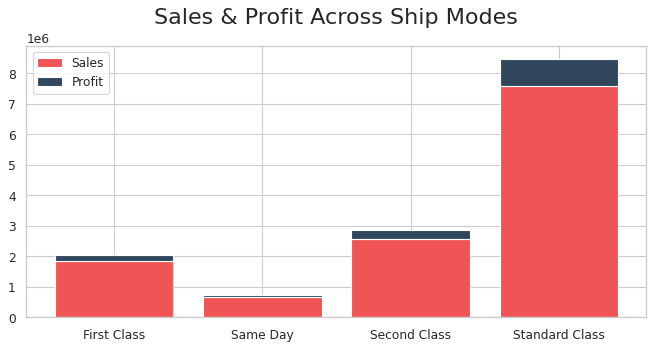

In [63]:
#Taking a subset of data (To keep things simple)
df_stackb = df[['ship_mode','discounted_sales','profit']]

#Taking a groupby on category and then ship mode...
df_stackb = df_stackb.groupby(['ship_mode']).sum().reset_index()

#Visualizing the Stacked BarChart
plt.figure(figsize=[10,15], dpi=80)
plt.subplot(3,1,1)
plt.bar(x=df_stackb['ship_mode'], height=df_stackb['discounted_sales'], color='#F05454')
plt.bar(x=df_stackb['ship_mode'], height=df_stackb['profit'], bottom=df_stackb['discounted_sales'], color='#30475E')
plt.title("Sales & Profit Across Ship Modes", size=20, pad=20)
plt.legend(['Sales','Profit'])

##17. Loss Analysis

In [64]:
#Calculate losses
loss_df = df[df['profit'] < 0]
loss_with_zero_df = df[(df['profit'] < 0) & (df['discount(%)'] == 0)]
loss_with_zero_df.head()

,order_id,order_date,year,year_month,month,day,customer_name,segment,state,market,region,product_id,category,sub_category,product_name,discounted_sales,quantity,discount(%),profit,shipping_cost,ship_date,ship_mode,order_priority,original_sales,unit_price,cost_price,discounted_amount,profit(%),delivery_days,status_delivery


In [65]:
#Show losses
loss_df

,order_id,order_date,year,year_month,month,day,customer_name,segment,state,market,region,product_id,category,sub_category,product_name,discounted_sales,quantity,discount(%),profit,shipping_cost,ship_date,ship_mode,order_priority,original_sales,unit_price,cost_price,discounted_amount,profit(%),delivery_days,status_delivery
3,IT-2011-3647632,2011-01-01,2011,2011-01,1,6,Eugene Moren,Home Office,Stockholm,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.87,3,0.50,-26.06,4.82,2011-01-05,Second Class,High,89.740000,29.913333,70.93,44.870000,-36.740448,4,Timely
8,ID-2011-80230,2011-01-03,2011,2011-01,1,1,Ken Lonsdale,Consumer,Auckland,APAC,Oceania,TEC-CO-10004182,Technology,Copiers,"Hewlett Wireless Fax, Laser",912.46,4,0.40,-319.46,107.10,2011-01-09,Standard Class,Low,1520.766667,380.191667,1231.92,608.306667,-25.931879,6,Delayed
10,IN-2011-65159,2011-01-03,2011,2011-01,1,1,Larry Blacks,Consumer,National Capital,APAC,Southeast Asia,OFF-ST-10003020,Office Supplies,Storage,"Tenex Lockers, Industrial",337.64,3,0.45,-122.80,33.75,2011-01-07,Second Class,High,613.890909,204.630303,460.44,276.250909,-26.670142,4,Timely
11,IN-2011-65159,2011-01-03,2011,2011-01,1,1,Larry Blacks,Consumer,National Capital,APAC,Southeast Asia,FUR-TA-10002797,Furniture,Tables,"Chromcraft Round Table, Adjustable Height",211.18,1,0.55,-70.40,21.32,2011-01-07,Second Class,High,469.288889,469.288889,281.58,258.108889,-25.001776,4,Timely
14,ID-2011-80230,2011-01-03,2011,2011-01,1,1,Ken Lonsdale,Consumer,Auckland,APAC,Oceania,FUR-CH-10000214,Furniture,Chairs,"Hon Rocking Chair, Set of Two",159.44,2,0.40,-95.68,10.07,2011-01-09,Standard Class,Low,265.733333,132.866667,255.12,106.293333,-37.503920,6,Delayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51267,IT-2014-3715679,2014-12-31,2014,2014-12,12,3,Jim Kriz,Home Office,North Brabant,EU,Central,OFF-AR-10000659,Office Supplies,Art,"BIC Pencil Sharpener, Fluorescent",30.27,2,0.50,-9.69,4.46,2015-01-05,Second Class,High,60.540000,30.270000,39.96,30.270000,-24.249249,5,Delayed
51272,IT-2014-3715679,2014-12-31,2014,2014-12,12,3,Jim Kriz,Home Office,North Brabant,EU,Central,OFF-BI-10002986,Office Supplies,Binders,"Avery Binder Covers, Recycled",22.86,4,0.50,-6.42,3.46,2015-01-05,Second Class,High,45.720000,11.430000,29.28,22.860000,-21.926230,5,Delayed
51274,TU-2014-5170,2014-12-31,2014,2014-12,12,3,Valerie Dominguez,Consumer,Konya,EMEA,EMEA,TEC-SAN-10004215,Technology,Accessories,"SanDisk Keyboard, Bluetooth",32.59,1,0.60,-25.28,3.40,2015-01-04,Second Class,Medium,81.475000,81.475000,57.87,48.885000,-43.684120,4,Timely
51275,ID-2014-54442,2014-12-31,2014,2014-12,12,3,Muhammed Yedwab,Corporate,National Capital,APAC,Southeast Asia,TEC-AC-10002221,Technology,Accessories,"Memorex Mouse, Bluetooth",61.97,4,0.45,-37.27,3.18,2015-01-04,Standard Class,Medium,112.672727,28.168182,99.24,50.702727,-37.555421,4,Timely


##18. Money Loss Within The 4 Year ($)

In [66]:
#Count total_loss
Total_loss=np.negative(loss_df['profit'].sum())
print("Total loss = %.2f" %Total_loss)

Total loss = 920361.11


In [67]:
#Average loss per discount
loss_df['discount(%)'].mean()

0.45090070978546937

In [68]:
#Average loss per segment
loss_df.groupby(by='segment').mean()

,year,month,day,discounted_sales,quantity,discount(%),profit,shipping_cost,original_sales,unit_price,cost_price,discounted_amount,profit(%),delivery_days
segment,,,,,,,,,,,,,,
Consumer,2012.764191,7.511660,3.275851,197.897088,3.439705,0.449798,-73.237090,21.382504,337.433064,98.914427,271.134178,139.535976,-30.189684,3.960110
Corporate,2012.787533,7.480637,3.369761,197.238504,3.384615,0.451657,-72.891631,21.032910,337.109918,98.928375,270.130135,139.871414,-30.439893,3.978249
Home Office,2012.785429,7.552643,3.342070,200.671599,3.462017,0.452826,-74.722483,20.757046,349.422614,97.456955,275.394083,148.751015,-30.515197,4.002665


In [69]:
#Average loss per category
loss_df.sort_values(['discounted_sales'],ascending=True).groupby(by='category').mean()

,year,month,day,discounted_sales,quantity,discount(%),profit,shipping_cost,original_sales,unit_price,cost_price,discounted_amount,profit(%),delivery_days
category,,,,,,,,,,,,,,
Furniture,2012.784062,7.531812,3.339974,346.028438,3.574550,0.400296,-118.856356,36.490482,573.756465,163.776648,464.884794,227.728027,-25.891480,3.959512
Office Supplies,2012.779666,7.488791,3.317721,89.056484,3.386263,0.483915,-37.695845,9.796676,162.203246,47.084574,126.752329,73.146761,-33.021068,3.989005
Technology,2012.750000,7.541667,3.280116,323.717446,3.356023,0.420488,-118.191473,34.333680,550.909225,164.048520,441.908919,227.191779,-28.219322,3.945132


In [70]:
#Average loss per sub-category
loss_df.groupby(by='sub_category').mean().sort_values('profit',ascending=True).head(3)

,year,month,day,discounted_sales,quantity,discount(%),profit,shipping_cost,original_sales,unit_price,cost_price,discounted_amount,profit(%),delivery_days
sub_category,,,,,,,,,,,,,,
Tables,2012.756048,7.495968,3.443548,692.892056,3.582661,0.430645,-290.571210,70.319214,1246.696652,353.568519,983.463266,553.804596,-28.820855,4.020161
Machines,2012.711454,7.612335,3.248899,429.536718,3.240088,0.456784,-173.288436,41.086101,797.485429,223.518464,602.825154,367.948711,-32.353514,3.845815
Appliances,2012.717277,7.759162,3.277487,413.154267,3.329843,0.483743,-167.517853,43.269424,718.272216,211.482329,580.672120,305.117949,-35.515855,3.874346


In [71]:
#Average loss per state
loss_df.groupby(by='state').mean().sort_values('profit',ascending=True).head(3)

,year,month,day,discounted_sales,quantity,discount(%),profit,shipping_cost,original_sales,unit_price,cost_price,discounted_amount,profit(%),delivery_days
state,,,,,,,,,,,,,,
Ibb,2014.0,11.0,4.0,354.56,6.0,0.7,-590.980,42.510,1181.866667,196.977778,945.540,827.306667,-62.501851,2.0
Shandong,2011.0,10.0,3.0,2018.33,9.0,0.3,-576.910,248.910,2883.328571,320.369841,2595.240,864.998571,-22.229543,5.0
Liaoning,2014.0,3.5,3.0,1831.44,6.5,0.3,-553.245,143.035,2616.342857,391.589626,2384.685,784.902857,-22.633524,2.5


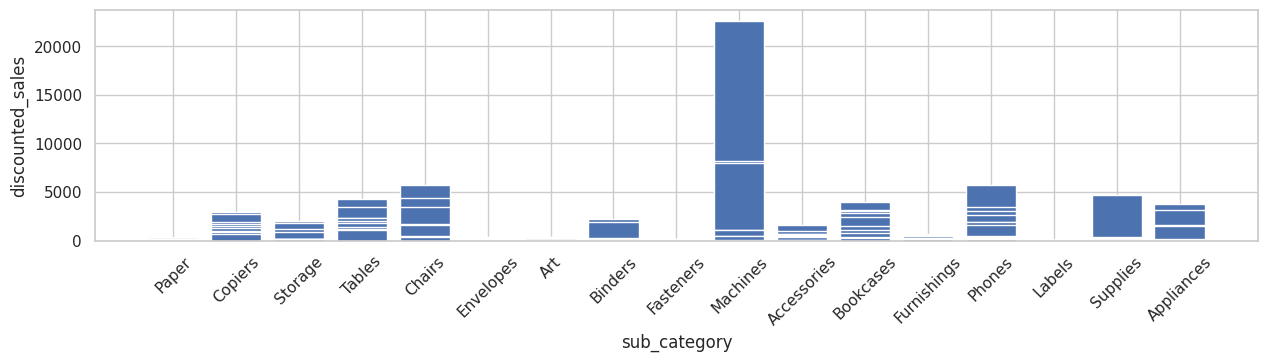

In [72]:
#Comparison graph of discounted sales against sub categories
plt.rcParams['figure.figsize']=(15,3)
plt.bar(loss_df['sub_category'],loss_df['discounted_sales']);
plt.xticks(rotation = 45)
plt.rcParams.update({'font.size':5});
plt.xlabel('sub_category');
plt.ylabel('discounted_sales');

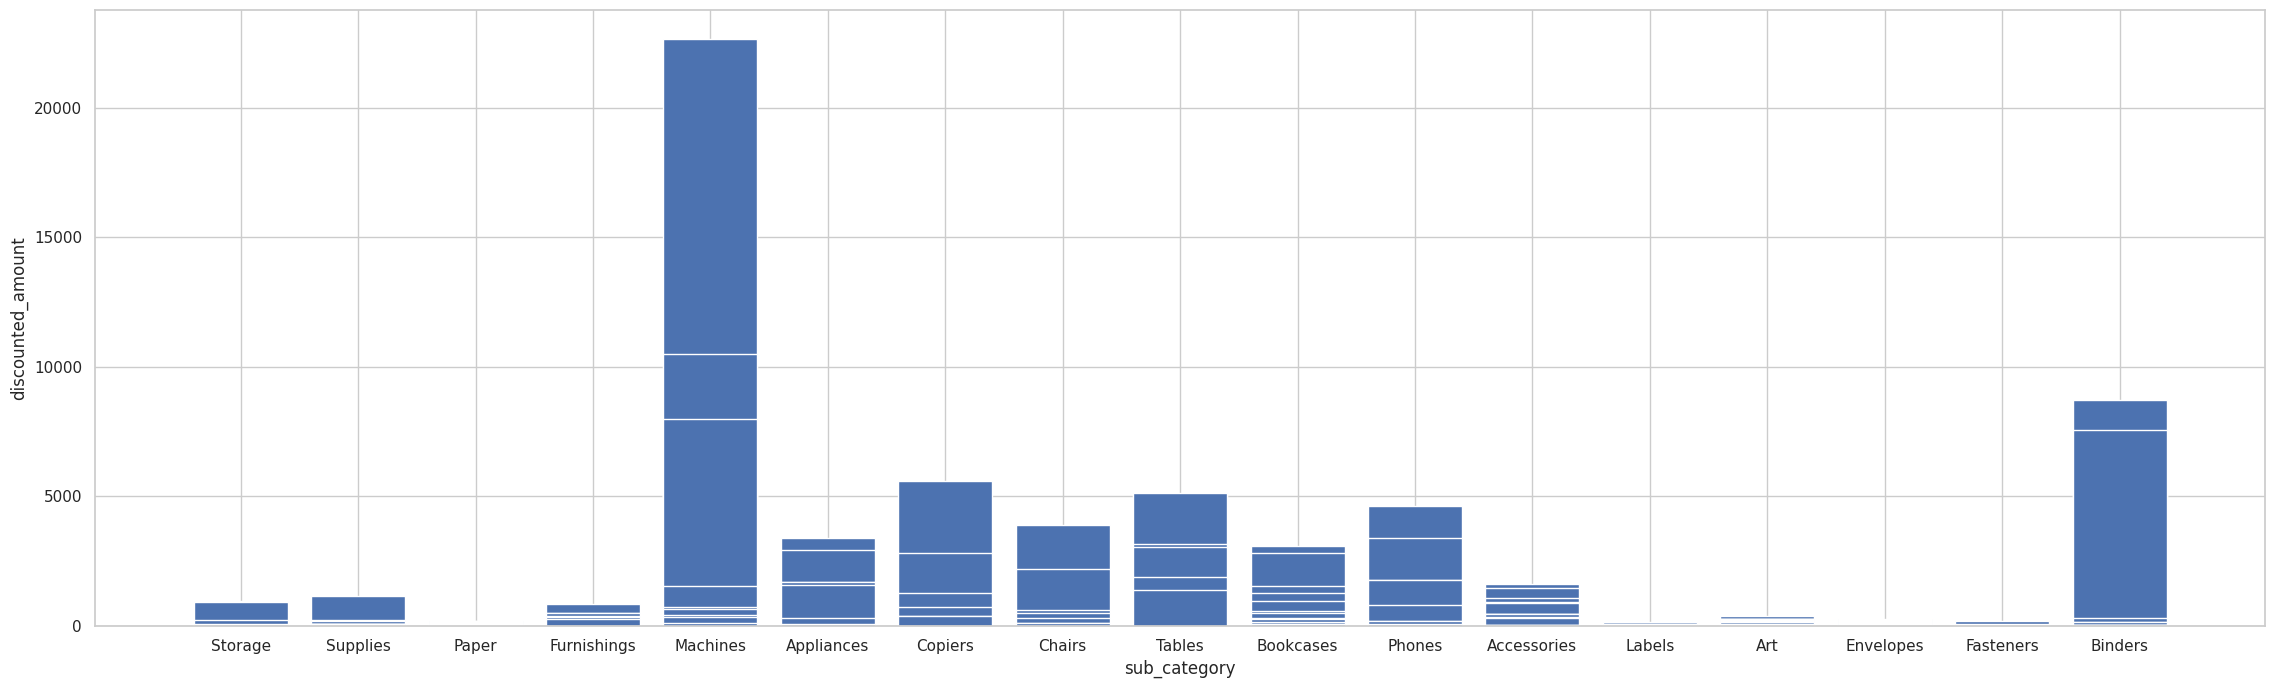

In [73]:
#Comparison graph of discounted amounts against sub categories
plt.rcParams['figure.figsize']=(28,8)
plt.bar(df['sub_category'],df['discounted_amount']);
plt.rcParams.update({'font.size':14});
plt.xlabel('sub_category')
plt.ylabel('discounted_amount')
plt.show()

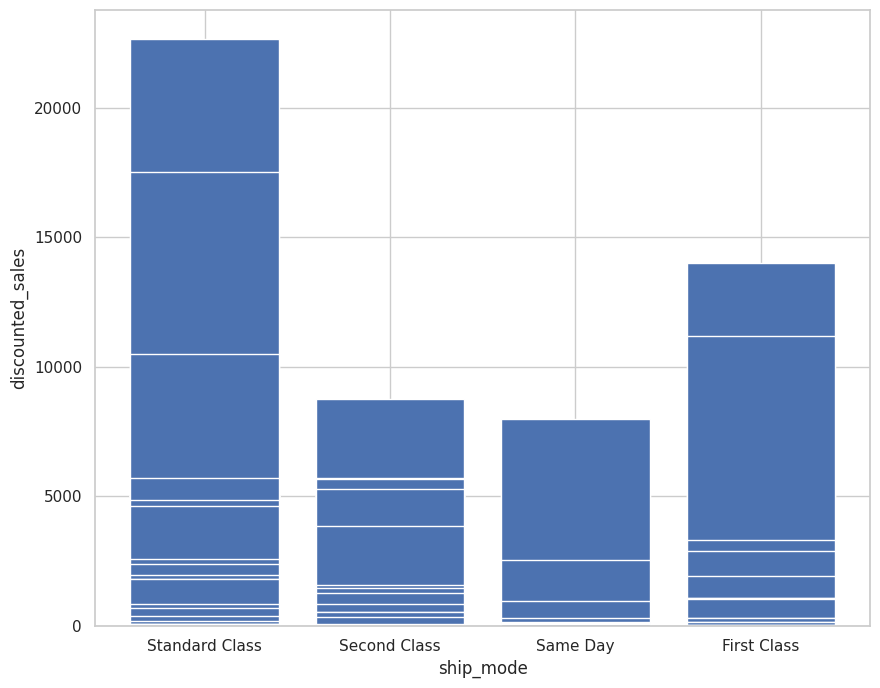

In [74]:
#Comparison graph of discounted sales against ship mode
plt.rcParams['figure.figsize']=(10,8)
plt.bar(df['ship_mode'],df['discounted_sales']);
plt.rcParams.update({'font.size':14});
plt.xlabel('ship_mode');
plt.ylabel('discounted_sales');

##19. Sales, Profit Proportions Across Various Features

In [75]:
#Customer regional analysis
region_analysis = pd.DataFrame(df.groupby(['region'])['profit'].sum().reset_index())
region_analysis

,region,profit
0,Africa,88871.13
1,Canada,17817.39
2,Caribbean,34571.35
3,Central,311403.88
4,Central Asia,132479.93
...,...,...
8,North Asia,165578.18
9,Oceania,121667.20
10,South,140355.92
11,Southeast Asia,17852.34


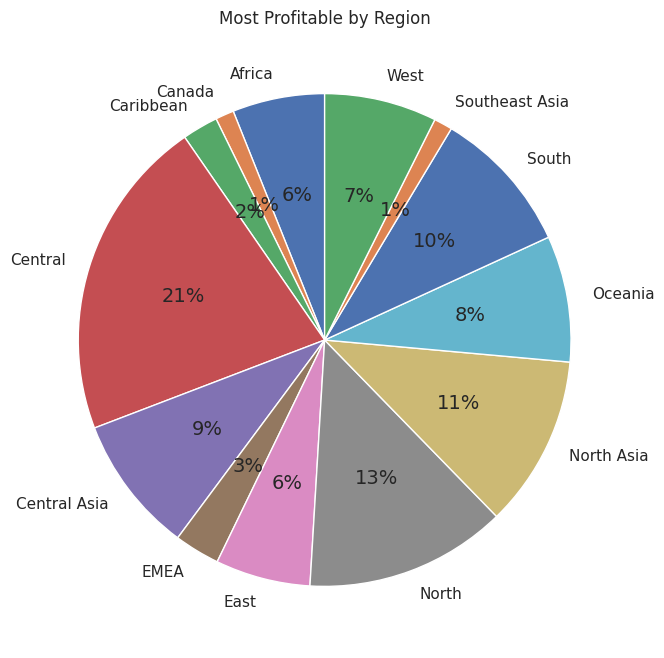

In [76]:
#Plot Pie Chart
plt.pie(region_analysis.profit, labels = region_analysis.region, startangle = 90, autopct = "%1.0f%%")
myexplode = [0, 0, 0, 0.1]
plt.title("Most Profitable by Region")
plt.show()

##20. Status Delivery
* Analysis of delayed orders and timely order. I set a limit of the delivery days to be 5. Any item delivered later than five is considered late/delayed as shown below.

<Axes: title={'center': 'Timely vs Delayed'}>

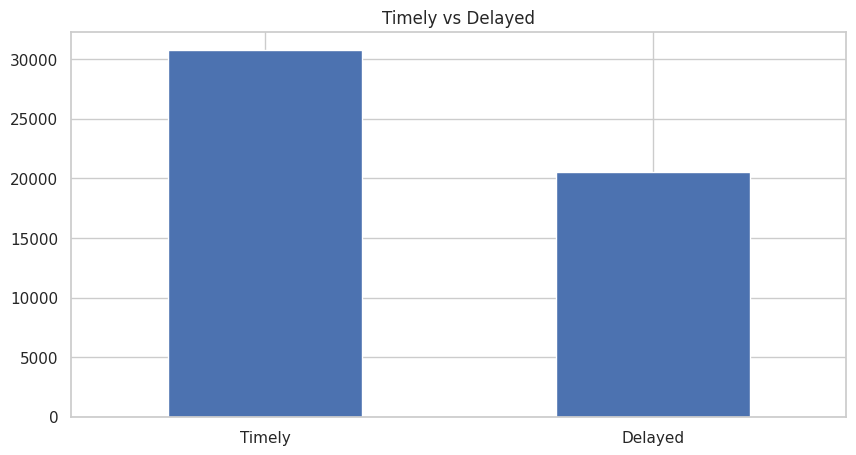

In [77]:
#Delivery status graph
plt.figure(figsize=(10,5))
delayed_count=df['status_delivery'].value_counts()
delayed_count.plot(kind = 'bar',title = 'Timely vs Delayed',rot=0)

In [78]:
#Shipping-mode wise distribution
shipping_dist = df.pivot_table(index='ship_mode', columns='status_delivery', values='original_sales', aggfunc='count', margins=True)
shipping_dist.rename({ 'All':'TotalOrders'}, axis=1, inplace=True)
shipping_dist['Timely_proportion'] = round((shipping_dist['Timely']/shipping_dist['TotalOrders'])*100,2)
shipping_dist['Delayed_proportion'] = round((shipping_dist['Delayed']/shipping_dist['TotalOrders'])*100,2)
shipping_dist

status_delivery,Delayed,Timely,TotalOrders,Timely_proportion,Delayed_proportion
ship_mode,,,,,
First Class,0,7505,7505,100.00,0.00
Same Day,0,2701,2701,100.00,0.00
Second Class,2188,8121,10309,78.78,21.22
Standard Class,18345,12430,30775,40.39,59.61
All,20533,30757,51290,59.97,40.03


**Insight:**
* Orders shipped with the 'first class' and 'Same day' modes did not experience any delay in their delivery. Same can be said for the larger sect of those who ordered using second class. Majority of the delayed orders can be found with customers who shipped using standard class. I went on to check the region distribution of the delayed and timely delivery to see if the distance also played a role

In [79]:
#Region-wise distribution
region_dist = df.pivot_table(index='region', columns='status_delivery', values='original_sales', aggfunc='count', margins=True)
region_dist.rename({ 'All':'TotalOrders'}, axis=1, inplace=True)
region_dist['Timely_proportion'] = round((region_dist['Timely']/region_dist['TotalOrders'])*100,2)
region_dist['Delayed_proportion'] = round((region_dist['Delayed']/region_dist['TotalOrders'])*100,2)
region_dist

status_delivery,Delayed,Timely,TotalOrders,Timely_proportion,Delayed_proportion
region,,,,,
Africa,1851,2736,4587,59.65,40.35
Canada,133,251,384,65.36,34.64
Caribbean,658,1032,1690,61.07,38.93
Central,4569,6548,11117,58.90,41.10
Central Asia,812,1236,2048,60.35,39.65
...,...,...,...,...,...
Oceania,1379,2108,3487,60.45,39.55
South,2609,4036,6645,60.74,39.26
Southeast Asia,1280,1849,3129,59.09,40.91


**Insight:**
* The maximum percentage of pending orders came from the Central Region, while Canada experienced the least.

**Recommendations**
* Focus on Technology and Office Supplies sub-category, especially on Phones and Bookcases as they are highest selling and most profitable. Bundle them with the less profitable products such as Art, Fasteners, and Labels to offset the losses.
* Selling Tables result in huge losses, so Super Store has to consider to bundle them together with High Selling or Profitable sub-category such as Chairs, Copiers, Machines and Phones.
* For Home Offices customers, these people might be busy with work and less likely to spend time selecting individual products, so create a Home Office package with products used for offices such as table, chairs, phone, copiers, storage, label, fasteners, bookcases.
* For loss-making products like Tables, consider to either drop these from the catalogue or change suppliers and bargain for cheaper price.
* Consumer and Corporate Segment make up more than 70% of customer base. Target them, especially customers from the Top 10 states with Highest Sales by introducing special promotions and bundles for mass Consumer and Home Offices and send promotional emails or flyers

The main reason which leads to loss is Discount as if some areas lead to loss due to more discounts, and some areas lead to fewer sales due to fewer discounts, hence it needs to be improved. It is better to give more discounts during festival seasons, additionally, that will result in more sales. The Home office segment needs better improvement. Some cities have fewer sales, lack of awareness can be the reason for this, hence advertising in those cities might help in more sales.